In [1]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import re
import helpers

# Analysis with filtered sport category metadata

In [2]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [3]:
filtered_df_sport_category['upload_date'] = pd.to_datetime(filtered_df_sport_category['upload_date'])
filtered_df_sport_category['year'] = filtered_df_sport_category['upload_date'].dt.year
filtered_df_sport_category['month'] = filtered_df_sport_category['upload_date'].dt.month
filtered_df_sport_category['day'] = filtered_df_sport_category['upload_date'].dt.day

# sort values by date
filtered_df_sport_category.sort_values(by='upload_date', inplace=True)
filtered_df_sport_category.reset_index(drop=True, inplace=True)

Add imaginary time, so we don't need to do a groupby (because there are multiple videos per day)

In [4]:
# filtered_df_sport_category['upload_date'] = filtered_df_sport_category['upload_date'] + pd.to_timedelta(np.arange(len(filtered_df_sport_category)) % (24 * 60), unit='m')

In [5]:
filtered_df_sport_category

categories                channel_id                  crawl_date  \
0           Sports  UCs0ACZIa1m4ecu2zijr-8Sg  2019-11-02 05:58:49.815667   
1           Sports  UCSXWt3Q5KZPTo_3Xjh-gkVQ  2019-11-14 00:16:20.587973   
2           Sports  UCusD6cPVuc9F9m3L50jCNiA  2019-11-11 18:44:52.507502   
3           Sports  UCSXWt3Q5KZPTo_3Xjh-gkVQ  2019-11-14 00:16:09.611858   
4           Sports  UCSXWt3Q5KZPTo_3Xjh-gkVQ  2019-11-14 00:16:08.374187   
...            ...                       ...                         ...   
4354407     Sports  UCSAys3yHQjH5n8y082xgHNg  2019-10-29 20:15:30.831802   
4354408     Sports  UC650u4npJNtyVbBGscP3Zfg  2019-11-20 22:24:26.555035   
4354409     Sports  UC650u4npJNtyVbBGscP3Zfg  2019-11-20 22:24:25.927339   
4354410     Sports  UCSAys3yHQjH5n8y082xgHNg  2019-11-23 15:34:20.110278   
4354411     Sports  UCSAys3yHQjH5n8y082xgHNg  2019-11-23 15:33:57.138936   

         dislike_count   display_id  duration  like_count  \
0                123.0  VaLXzI92t9M        60      4848.0   
1                275.0  uSMy78BzZ9s       208      4423.0   
2                  3.0  mGN9vh0i-zg        58       311.0   
3                 79.0  6LgfyUeFlzw       122      6839.0   
4                  1.0  5CUUgxH6xcI       109         6.0   
...                ...          ...       ...         ...   
4354407            0.0  sFrATmJ5y2s      1093        19.0   
4354408            1.0  NNZlaGACKyg      1390       100.0   
4354409            4.0  ch1iLWBZ9CA      1464        98.0   
4354410            1.0  36w5skJiU78       454        25.0   
4354411            0.0  _5U1QUsSwOM       379        17.0   

                                                      tags  \
0        youtube,crazy,stunt,backflip,COBALTGRUV,jumpin...   
1        Skateboard,Skateboarding,Skate,trick,tips,Bret...   
2                                            skateboarding   
3        Brett,Novak,Tim,Pool,manual,Skateboarding,skat...   
4        Brett,Novak,Bret,Alex,Lutz,Quality,Skateboardi...   
...                                                    ...   
4354407  Jim Cornette,Monday Nitro,WCW,Conrad Thompson,...   
4354408  Realtree,chasing november,chasing november 201...   
4354409  Realtree,hunting,bill jordan,camouflage,huntin...   
4354410  Jim Cornette,Monday Nitro,WCW,Conrad Thompson,...   
4354411  Jim Cornette,Monday Nitro,WCW,Conrad Thompson,...   

                                                     title upload_date  \
0                              First Back Flip on Youtube!  2005-05-24   
1                               Skateboard trick tip video  2005-10-27   
2                                        nka skatelab part  2005-11-27   
3                    Tim Pool - Day at a Chicago Warehouse  2006-01-19   
4                                Newer old Alex Lutz footy  2006-01-31   
...                                                    ...         ...   
4354407  Tony Schiavone Calls Vader vs  Dustin Rhodes f...  2019-10-28   
4354408     S4E23: Holiday Buck Success, Missouri Bow Buck  2019-10-29   
4354409      S4E24: New Years Day Success, Season’s Finale  2019-10-30   
4354410  Tony Schiavone calls Alundra Blayze vs Malia H...  2019-11-11   
4354411  Tony Schiavone calls Jimmy Snuka vs Barry Horo...  2019-11-18   

         view_count  year  month  day  
0          291474.0  2005      5   24  
1         1700461.0  2005     10   27  
2           12745.0  2005     11   27  
3          130326.0  2006      1   19  
4            3820.0  2006      1   31  
...             ...   ...    ...  ...  
4354407       335.0  2019     10   28  
4354408      8702.0  2019     10   29  
4354409      5792.0  2019     10   30  
4354410       750.0  2019     11   11  
4354411       529.0  2019     11   18  

[4354412 rows x 14 columns]

## Analysis on superbowl

In [6]:
superbowl_df = helpers.keyword_searcher(filtered_df_sport_category, ['superbowl'])

superbowl_df

categories                channel_id                  crawl_date  \
2655        Sports  UCG4IsPelLNPJZrL7sqZmBPQ  2019-10-31 03:00:39.390451   
5987        Sports  UCT-FJ4sgZ-0OCTmyf1tmKwQ  2019-11-17 12:53:31.478653   
14556       Sports  UCL_OEjsHTwsHK6WKWs7s7Uw  2019-11-08 04:27:40.751277   
14558       Sports  UCL_OEjsHTwsHK6WKWs7s7Uw  2019-11-08 04:27:41.705060   
14585       Sports  UCFUWcce_D9zTeRx6L0rasvw  2019-11-23 06:36:58.033076   
...            ...                       ...                         ...   
4350957     Sports  UCO_mwnlHJtM0KQnX9q33Q2Q  2019-11-12 01:03:09.726419   
4351962     Sports  UCaYxyR9mzVlTrOOyZD0XAmA  2019-11-14 20:51:35.653769   
4352453     Sports  UCO_mwnlHJtM0KQnX9q33Q2Q  2019-11-12 01:03:09.105442   
4352602     Sports  UCLXzq85ijg2LwJWFrz4pkmw  2019-11-03 07:19:42.833979   
4353203     Sports  UCY-IDqcyz8tev_jmRboQRsg  2019-10-30 10:58:48.035236   

         dislike_count   display_id  duration  like_count  \
2655               3.0  D_55YelsthE         3        34.0   
5987               2.0  EBD9Zz3hiI4        33         2.0   
14556              1.0  3xYu0QUFrak       162         4.0   
14558              1.0  1_VDh7V_Pzs       159         7.0   
14585              3.0  Gx9Y_qDh0f8        63        37.0   
...                ...          ...       ...         ...   
4350957           10.0  -7thtYh59fM       824       716.0   
4351962          268.0  Q8Qs0-8AsQM       825     21544.0   
4352453           27.0  VGKa_WtZv6A       932       778.0   
4352602          166.0  BZz-nFdcDJY       827      2990.0   
4353203           11.0  hCWp7lErTu4       119        25.0   

                                                      tags  \
2655       super,bowl,41,fly-by,thunderbird,F-16,superbowl   
5987              sports,superbowl,xli,reggie,bush,rolling   
14556    SNY,Sny,sny,giants,Giants,new,york,New,York,sp...   
14558    Sny,sny,SNY,SportsNet,SportsNY,New,York,antoni...   
14585    CEO,robert,brady,touchdown,tom,MVP,Bowl,footba...   
...                                                    ...   
4350957  Jmellflo,Jmellflo madden 20,Most feared madden...   
4351962  mmg,mmg madden 20,madden 20 superbowl,madden 2...   
4352453  trash talker exposed,jmellflo trash talk,god s...   
4352602  NFL,football,NFL Week 5,Week 5 NFL,Week 5,Dall...   
4353203  Football,American Football,Sports,NFL,NFL Draf...   

                                                     title upload_date  \
2655                                  Super Bowl 41 Fly-by  2007-02-06   
5987     Superbowl XLI, Reggie Bush and The Rolling Sto...  2007-05-24   
14556                             SNY.tv - Daily News Live  2008-01-24   
14558                                  SNY.tv - SportsNite  2008-01-24   
14585                       Patriots MVP Tom Brady on CNBC  2008-01-24   
...                                                    ...         ...   
4350957  THE CLICK ON IS REAL!! HALLOWEEN SEASON!!! | G...  2019-10-01   
4351962  Huge Hits In The SUPERBOWL! Wheel of MUT! Ep. #16  2019-10-02   
4352453  Trash Talker Exposed!!! JMELLFLO VS LA CAPONE ...  2019-10-02   
4352602  Cowboys aren’t a lock to win the division or g...  2019-10-02   
4353203         AWS Biggest Movers: Cleveland Browns | PFF  2019-10-02   

         view_count  year  month  day  
2655        10970.0  2007      2    6  
5987         3122.0  2007      5   24  
14556        1842.0  2008      1   24  
14558        2726.0  2008      1   24  
14585       28203.0  2008      1   24  
...             ...   ...    ...  ...  
4350957     15132.0  2019     10    1  
4351962    652935.0  2019     10    2  
4352453     20438.0  2019     10    2  
4352602    391890.0  2019     10    2  
4353203      1191.0  2019     10    2  

[2426 rows x 14 columns]

### Word cloud

In [7]:
from wordcloud import WordCloud
from collections import Counter


def create_word_cloud(df, column, split_char=','):
    # Combine all tags into a single list
    all_values_column = [tag for sublist in df[column].str.split(
        split_char).tolist() for tag in sublist]

    # Count the frequency of each tag
    tag_counts = Counter(all_values_column)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white').generate_from_frequencies(tag_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

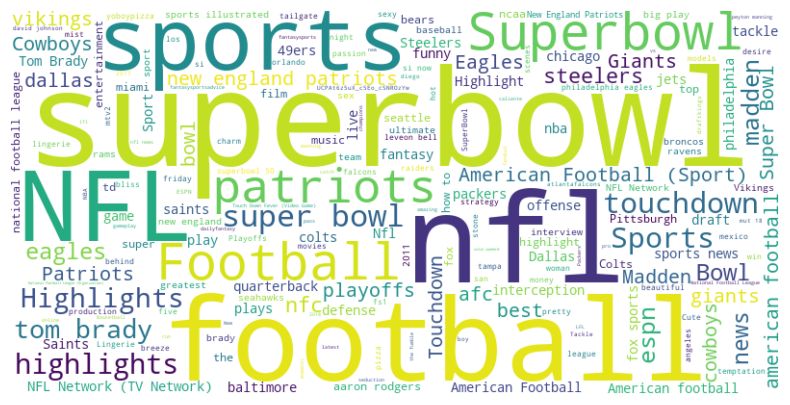

In [8]:
create_word_cloud(superbowl_df, 'tags')

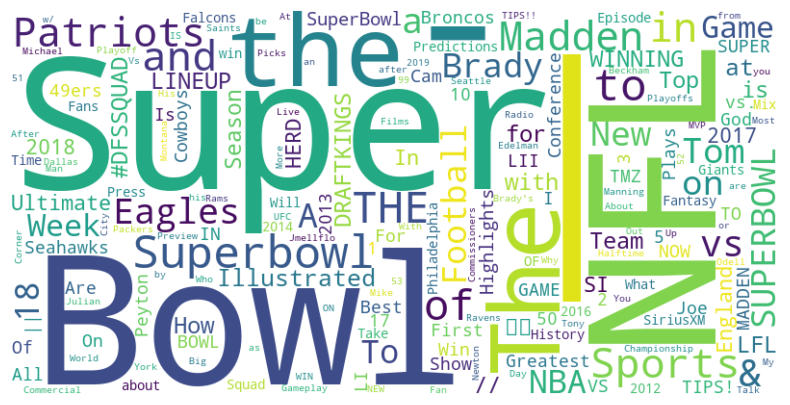

In [9]:
create_word_cloud(superbowl_df, 'title', " ")

### Graphs

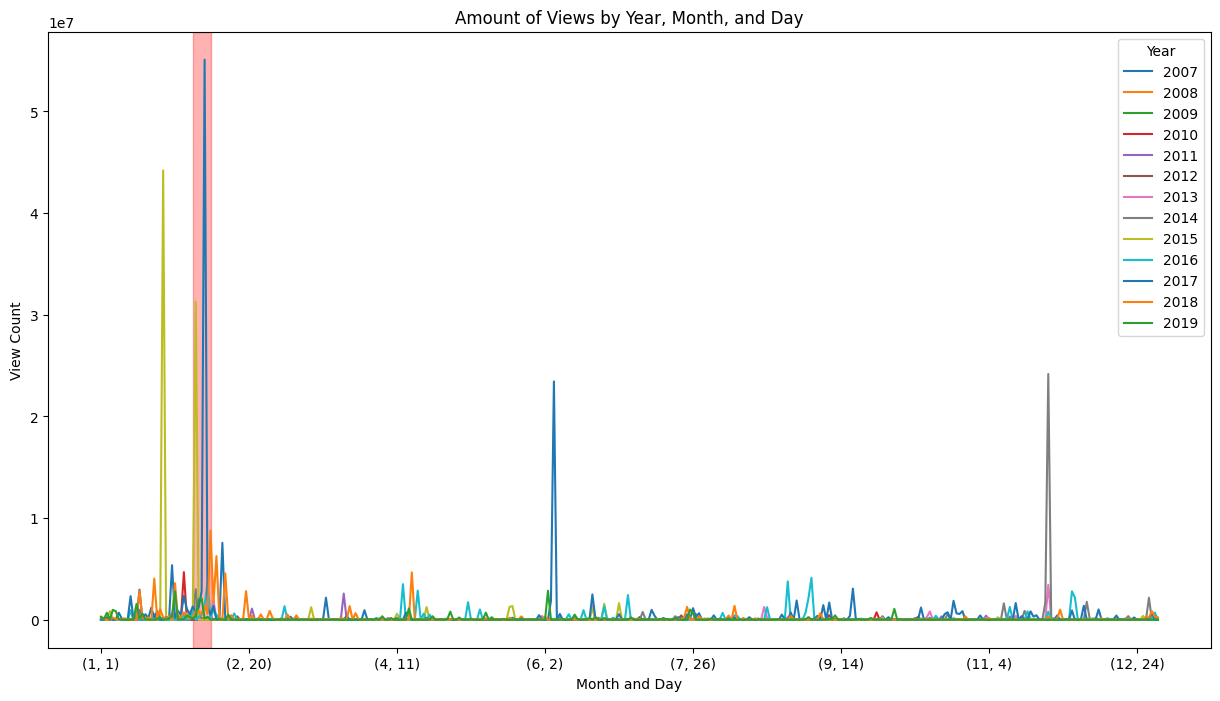

In [10]:
# Group by year, month, and day and sum the view counts
grouped_df = superbowl_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')

# superbowl happened between these dates for year 2005 to 2019
feb_1_index = pivot_df.index.get_loc((2, 1))
feb_7_index = pivot_df.index.get_loc((2, 7))

plt.axvspan(feb_1_index, feb_7_index, color='red', alpha=0.3)

plt.show()

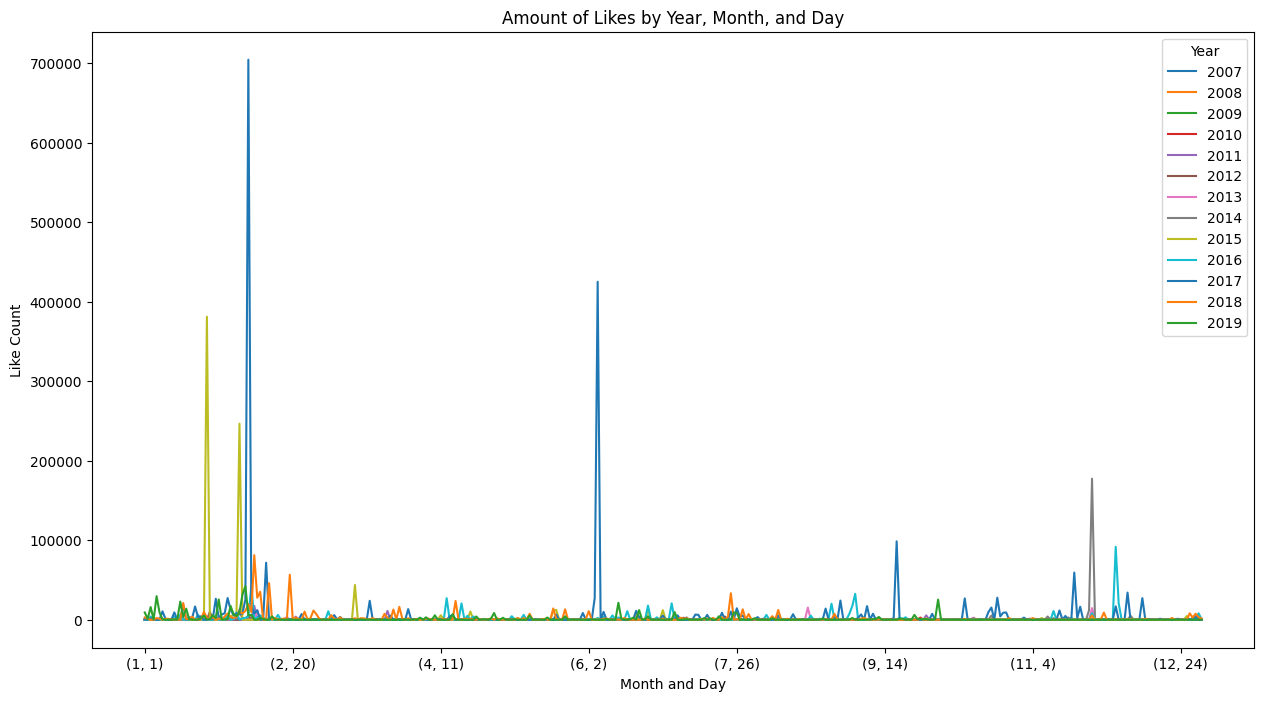

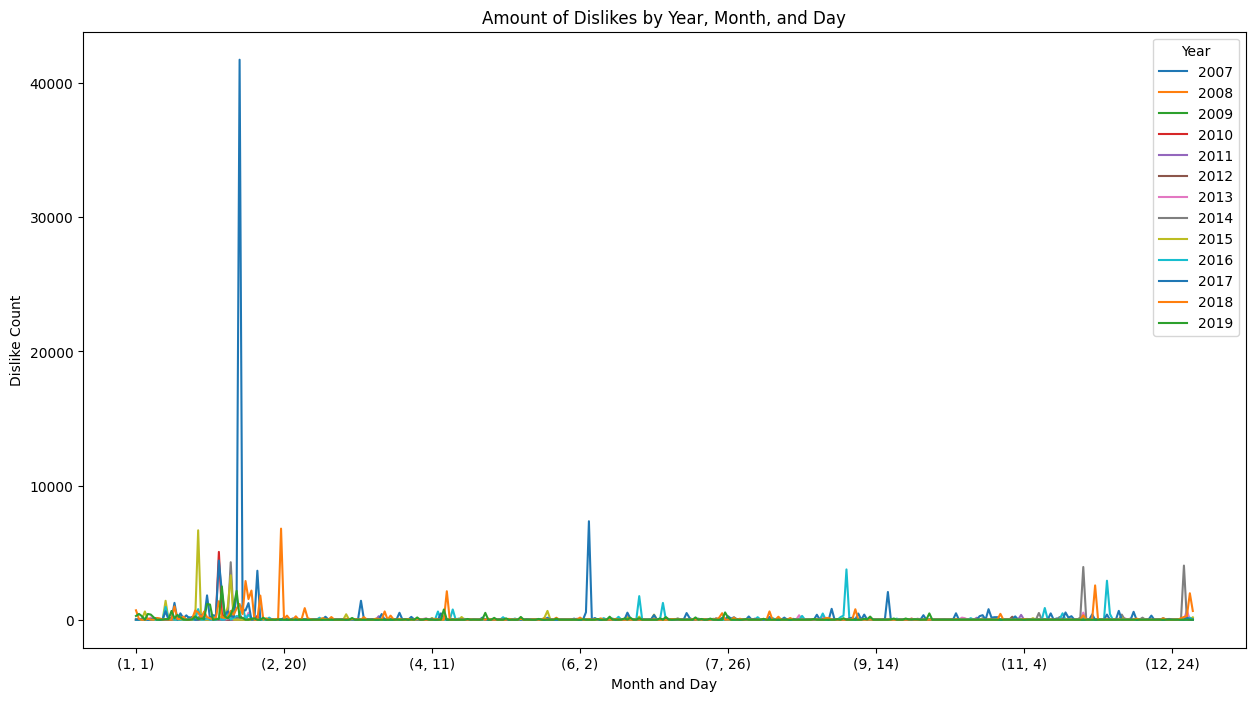

In [11]:
# Group by year, month, and day and sum the like and dislike counts
likes_dislikes_df = superbowl_df.groupby(['year', 'month', 'day'])[['like_count', 'dislike_count']].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows for likes
pivot_likes_df = likes_dislikes_df.pivot_table(index=['month', 'day'], columns='year', values='like_count', fill_value=0)

# Pivot the table to have years as columns and months/days as rows for dislikes
pivot_dislikes_df = likes_dislikes_df.pivot_table(index=['month', 'day'], columns='year', values='dislike_count', fill_value=0)

# Plot the data for likes
pivot_likes_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Likes by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('Like Count')
plt.legend(title='Year')
plt.show()

# Plot the data for dislikes
pivot_dislikes_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Dislikes by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('Dislike Count')
plt.legend(title='Year')
plt.show()

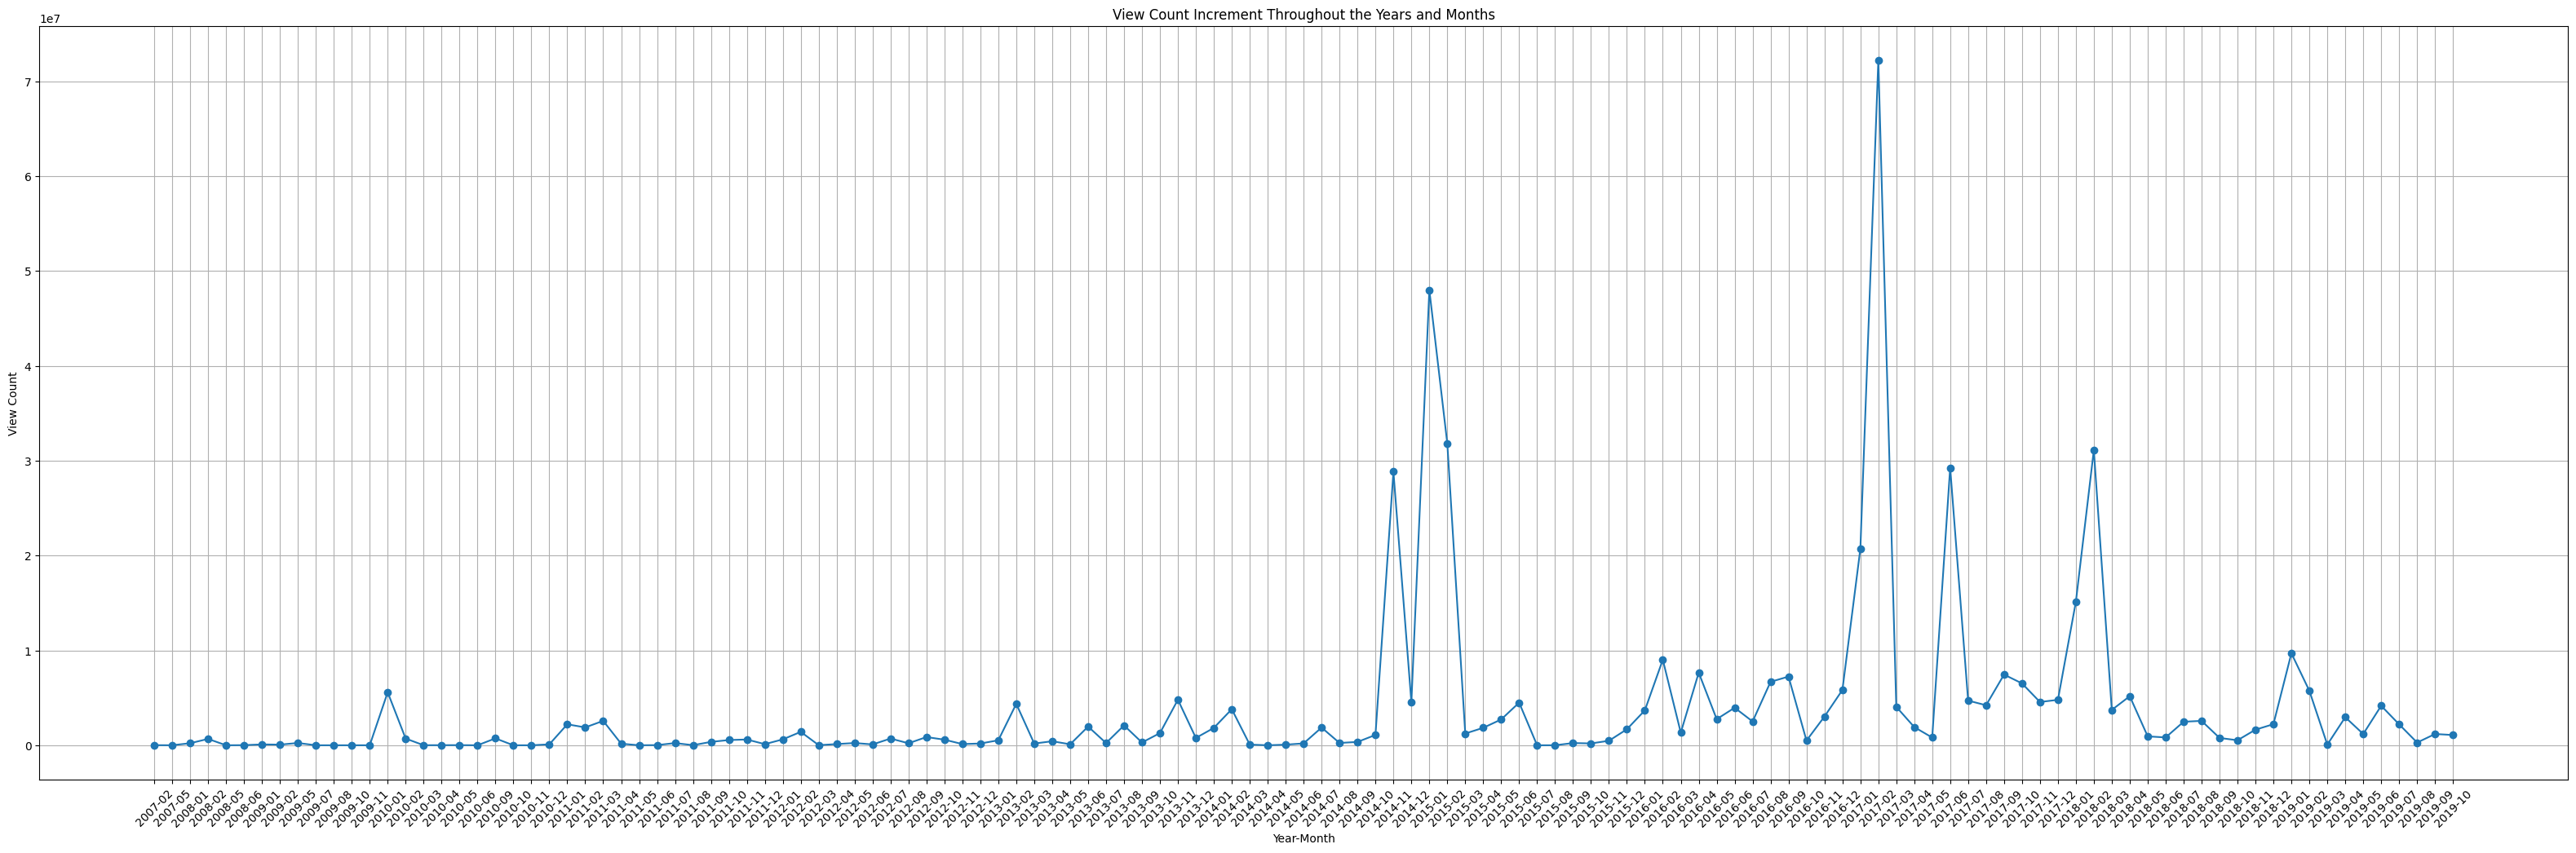

In [12]:
# Create a new column that combines year and month
superbowl_df['year_month'] = superbowl_df['year'].astype(str) + '-' + superbowl_df['month'].astype(str).str.zfill(2)

# Group by the new 'year_month' column and sum the view counts
year_month_view_count = superbowl_df.groupby('year_month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(40, 12))
plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
plt.title('View Count Increment Throughout the Years and Months')
plt.xlabel('Year-Month')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The peaks here are always in the january and then falls in february, which is the superbowl month. (it seems the most engangment for whole months is 1 month before the superbowl.).

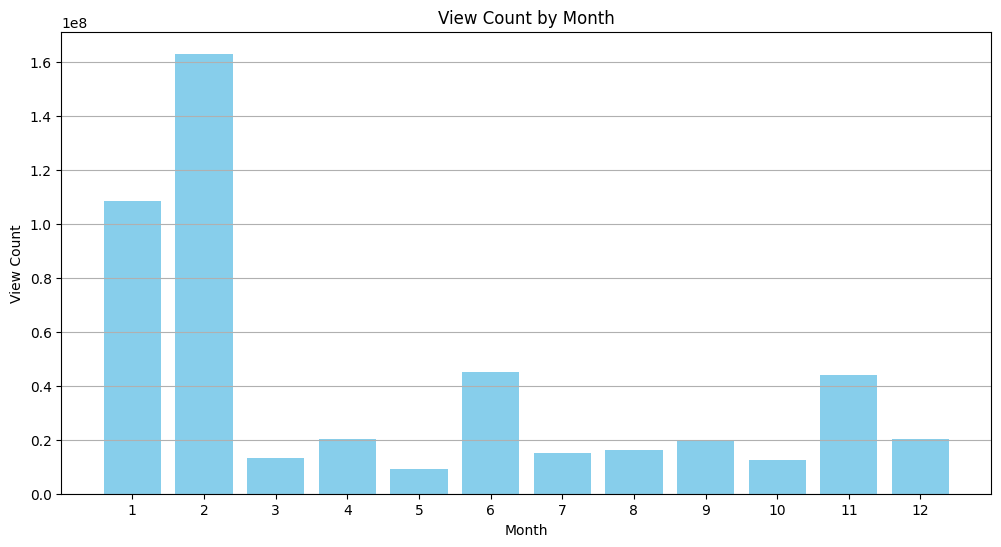

In [13]:
monthly_data = superbowl_df.groupby('month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_data['month'], monthly_data['view_count'], color='skyblue')
plt.title('View Count by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.xticks(monthly_data['month'])
plt.grid(axis='y')
plt.show()

## Analysis on NFL

In [14]:
nfl_df = helpers.keyword_searcher(filtered_df_sport_category, ['nfl'])
nfl_df

categories                channel_id                  crawl_date  \
282         Sports  UCBx85zuCdOQLOJEYpXgxKWg  2019-11-11 11:40:39.233039   
283         Sports  UCBx85zuCdOQLOJEYpXgxKWg  2019-11-11 11:40:38.686396   
2163        Sports  UCuWsua1_gQ0inbBTqxmYuIQ  2019-10-31 02:22:54.243960   
2221        Sports  UC5Y52fCWFDJh-4wkgSH4wDQ  2019-11-20 13:37:49.927285   
2230        Sports  UC5Y52fCWFDJh-4wkgSH4wDQ  2019-11-20 13:37:51.114510   
...            ...                       ...                         ...   
4354169     Sports  UCzkFCRiMcOBeef8xcaqipmw  2019-11-04 14:04:53.603929   
4354217     Sports  UCORy0Yqzd8bVj2Gb4xyq6HA  2019-10-30 00:44:40.196375   
4354220     Sports  UC0hynOfR6nUFrkipQOoa2XQ  2019-11-05 04:46:15.672508   
4354240     Sports  UCE3yf1AcIlXdps2EYbq3lzw  2019-11-03 22:29:28.617850   
4354295     Sports  UCFDidMd82mpDkKijLUqHp7A  2019-10-31 23:50:23.293637   

         dislike_count   display_id  duration  like_count  \
282                1.0  DSb4_Y1kl2M        29         1.0   
283                1.0  Y7YwCV9j8KY        37         3.0   
2163              16.0  NfhTVxA3e5w        45       433.0   
2221               0.0  4DclvkRs1Vo       228         2.0   
2230               2.0  GHgSOi4L2CY       118        22.0   
...                ...          ...       ...         ...   
4354169            2.0  lo90H8Egvx4       145       120.0   
4354217            2.0  QHdBerXvaKQ       382        35.0   
4354220            0.0  IO--gfJuEs4       179        36.0   
4354240           20.0  2mNK3iqqsWg       231       379.0   
4354295          140.0  p-VxDrRljUk       839      2764.0   

                                                      tags  \
282            zodiac,boat,benidorm,inflatable,medline,rib   
283      zodiac,boat,campomanes,rubecan,medline,inflata...   
2163     vertical,vert,leap,basketball,NFL,combine,jord...   
2221        Who,Dats,Times-Picayune,New,Orleans,Saints,NFL   
2230                    Saints,New,Orleans,NFL,quarterback   
...                                                    ...   
4354169  Seattle Seahawks,National Football League,NFL,...   
4354217  Dan Patrick,The Dan Patrick Show,Danettes,Spor...   
4354220  Anshuman Gaekwad,CAC,Cricket Advisory committe...   
4354240  TMZ,TMZ Sports,TMZ Sports Channel,Celebrity,Sp...   
4354295  fox,fox sports,fs1,fox sports 1,colin cowherd,...   

                                                     title upload_date  \
282                                Zodiac boating Benidorm  2006-06-22   
283                                   Zodiac boating Ifach  2006-06-22   
2163     Highest asian vertical - Frank Yang's official...  2007-01-15   
2221                                              Who Dats  2007-01-18   
2230                                            Drew Brees  2007-01-18   
...                                                    ...         ...   
4354169         2019 Week 5: Seahawks vs Rams Key Matchups  2019-10-03   
4354217  Mock-tober Is Here!!! Some Way-Too-Early NFL D...  2019-10-03   
4354220  Anshuman Gaekwad resigns from CAC  सीएसी के सभ...  2019-10-03   
4354240  P.J. Williams' GF Used Rams-Saints Call To Try...  2019-10-03   
4354295  Wilson is most underrated player in NFL, Dak h...  2019-10-03   

         view_count  year  month  day  
282          2322.0  2006      6   22  
283          2992.0  2006      6   22  
2163       282212.0  2007      1   15  
2221         2339.0  2007      1   18  
2230        14834.0  2007      1   18  
...             ...   ...    ...  ...  
4354169      2850.0  2019     10    3  
4354217      4273.0  2019     10    3  
4354220       876.0  2019     10    3  
4354240     55206.0  2019     10    3  
4354295    226432.0  2019     10    3  

[184931 rows x 14 columns]

### Word cloud

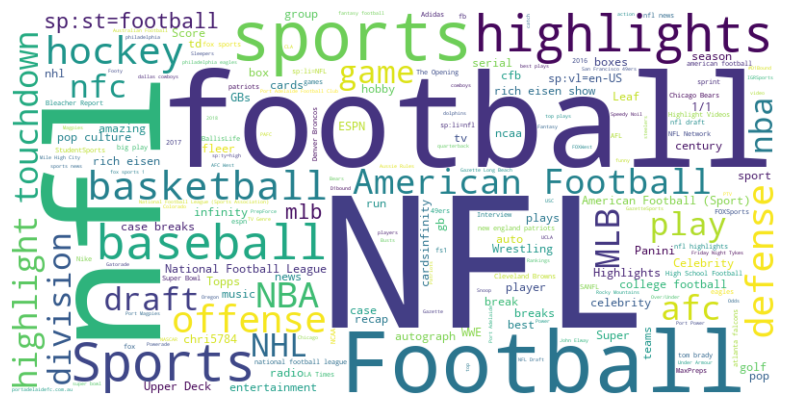

In [15]:
create_word_cloud(nfl_df, 'tags')

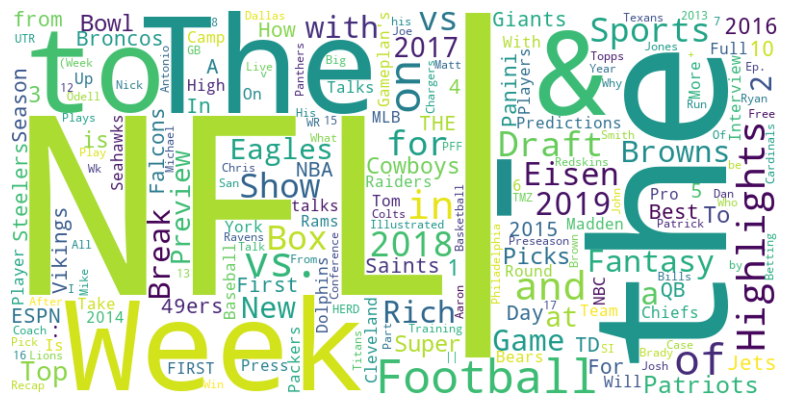

In [16]:
create_word_cloud(nfl_df, 'title', " ")

### Graphs

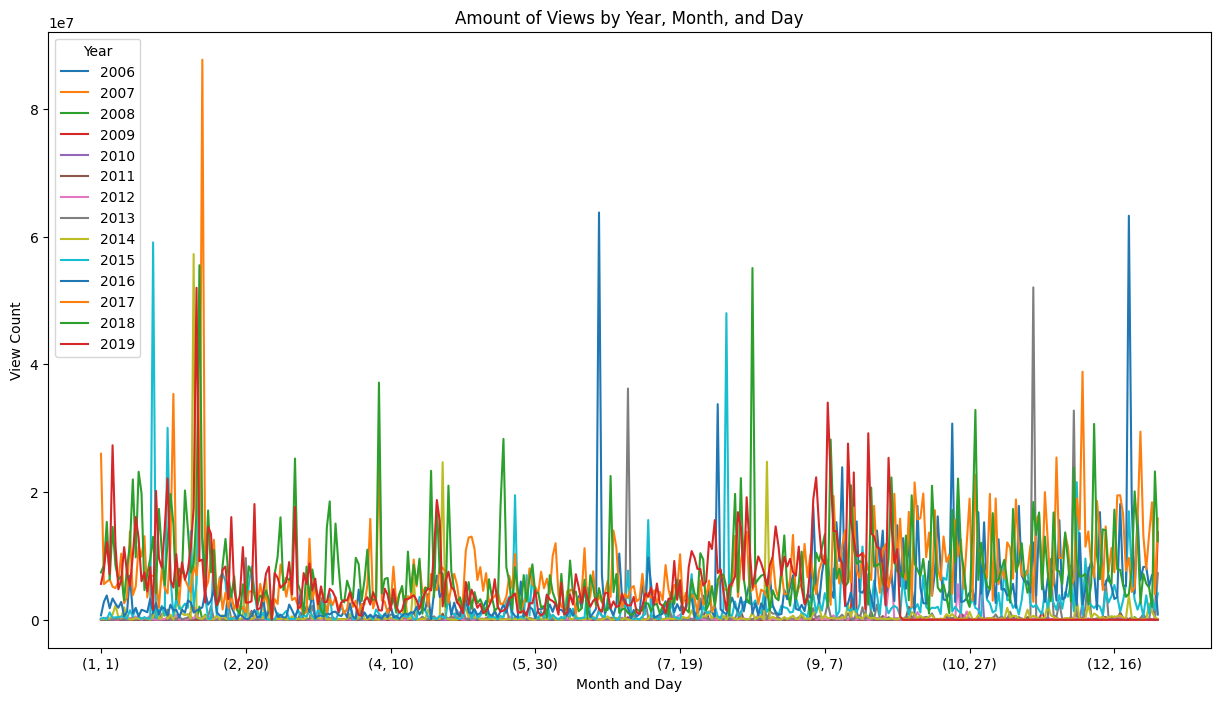

In [17]:
# Group by year, month, and day and sum the view counts
grouped_df = nfl_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

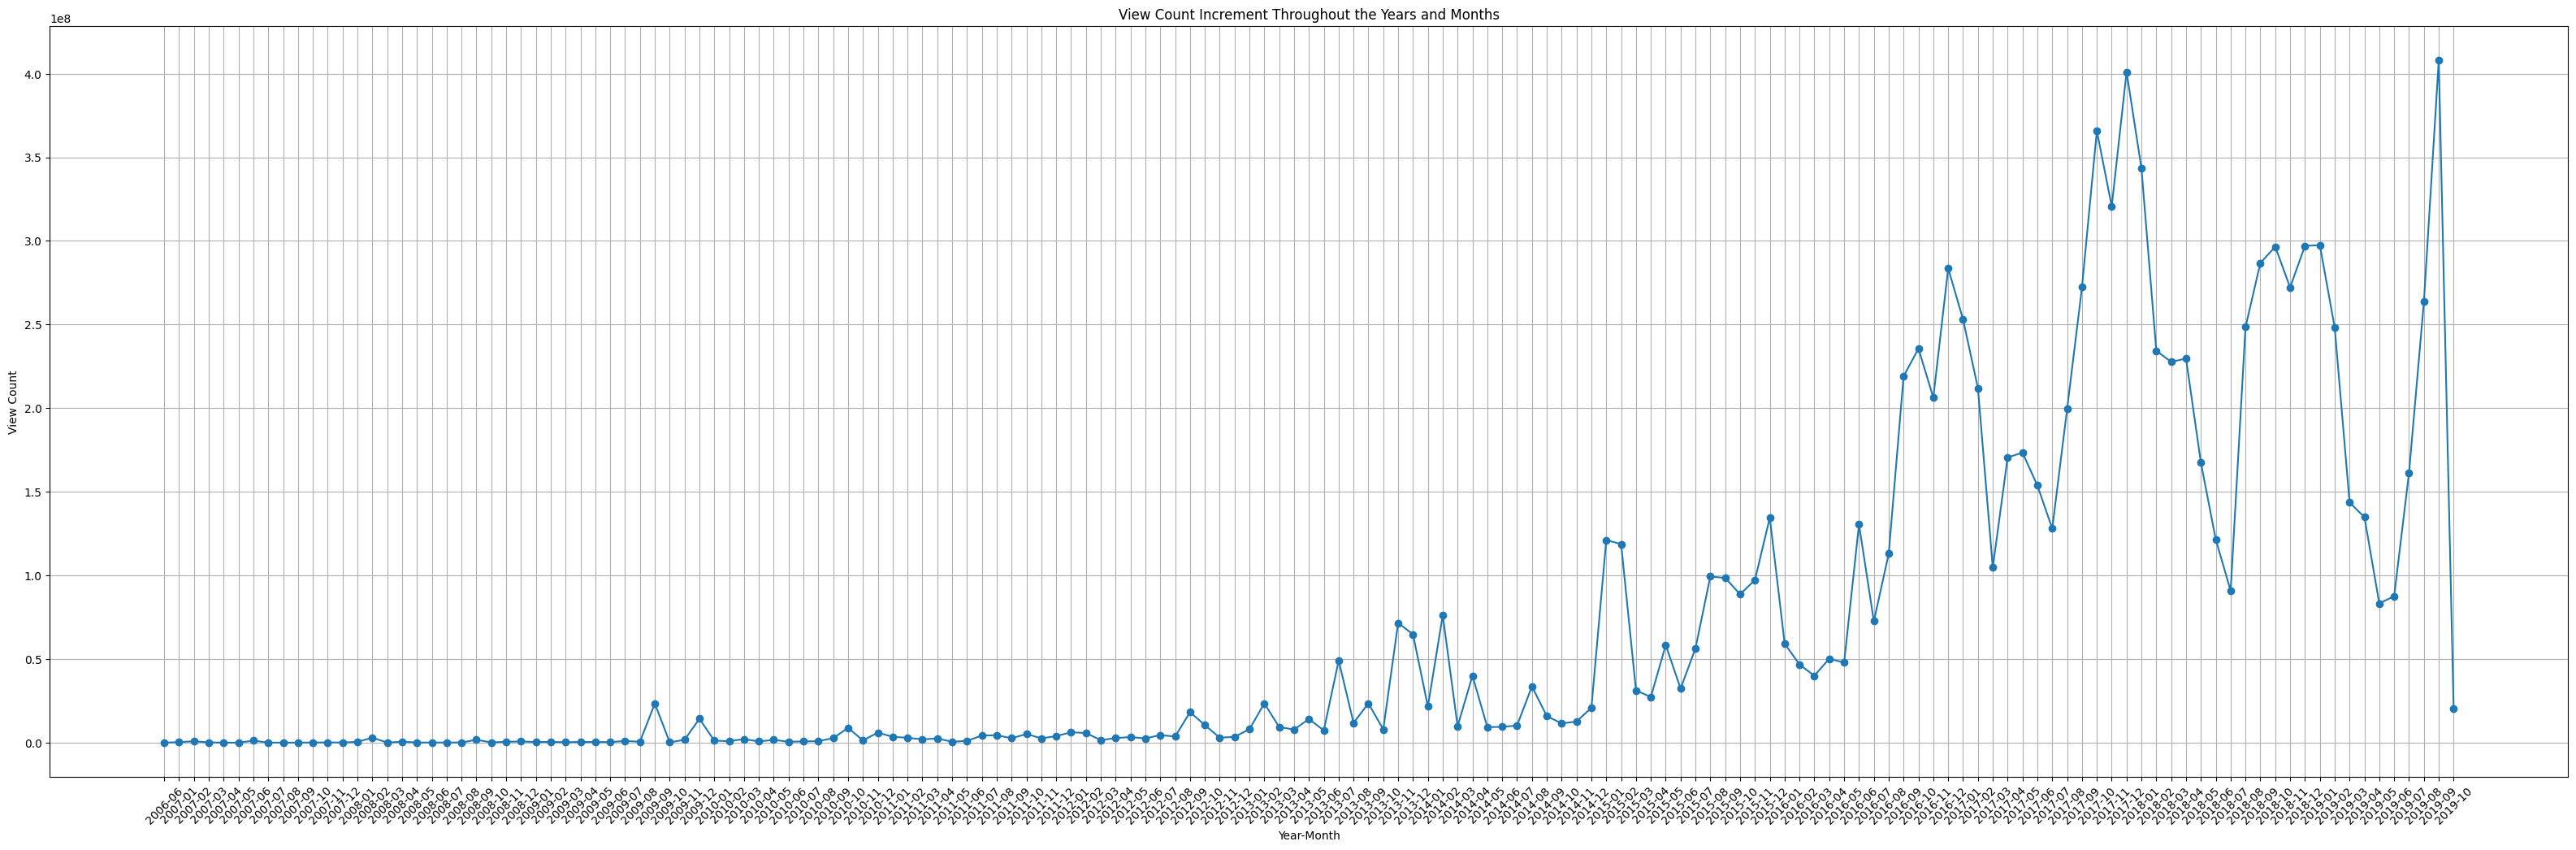

In [18]:
# Create a new column that combines year and month
nfl_df['year_month'] = nfl_df['year'].astype(str) + '-' + nfl_df['month'].astype(str).str.zfill(2)

# Group by the new 'year_month' column and sum the view counts
year_month_view_count = nfl_df.groupby('year_month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(40, 12))
plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
plt.title('View Count Increment Throughout the Years and Months')
plt.xlabel('Year-Month')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

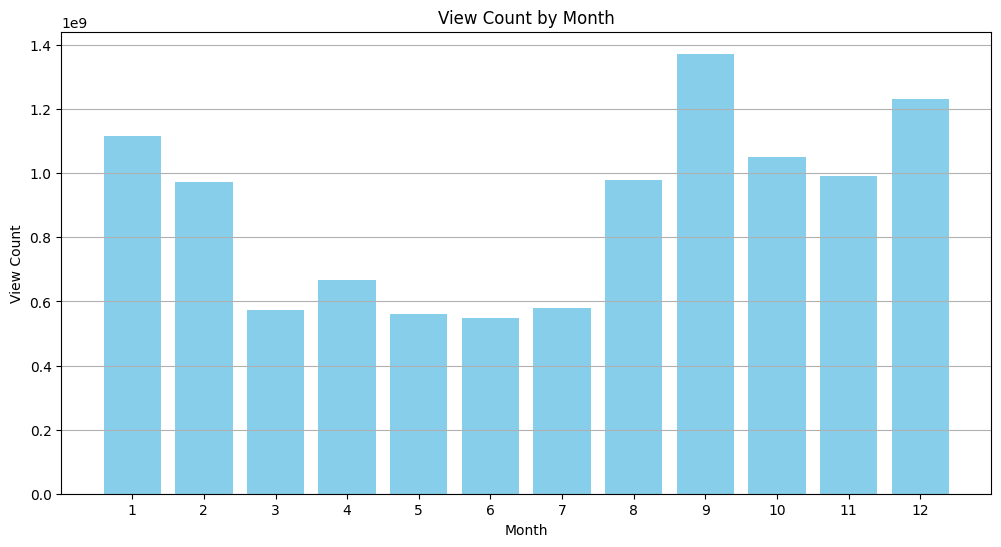

In [19]:
monthly_data = nfl_df.groupby('month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_data['month'], monthly_data['view_count'], color='skyblue')
plt.title('View Count by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.xticks(monthly_data['month'])
plt.grid(axis='y')
plt.show()

In [20]:
filtered_df_sport_category.isna().sum()

categories           0
channel_id           0
crawl_date           0
dislike_count    56782
display_id           0
duration             0
like_count       56782
tags                 0
title                0
upload_date          0
view_count           2
year                 0
month                0
day                  0
dtype: int64

## Analysis on american football

In [21]:
american_football_df = helpers.keyword_searcher(filtered_df_sport_category, ['american football'])

american_football_df

categories                channel_id                  crawl_date  \
9664        Sports  UCN4iWTZIICpOe-78cz9RP1A  2019-11-14 22:45:46.895056   
15590       Sports  UCqnbDFdCpuN8CMEg0VuEBqA  2019-11-01 10:40:33.733391   
18500       Sports  UC49ta0RHXJUiID5KWRkcySw  2019-11-18 19:58:54.147512   
18508       Sports  UC49ta0RHXJUiID5KWRkcySw  2019-11-18 19:58:55.693885   
18550       Sports  UCOBlh9E4bgmCWrDhuQGEkQA  2019-11-07 10:28:46.529182   
...            ...                       ...                         ...   
4353274     Sports  UCY-IDqcyz8tev_jmRboQRsg  2019-10-30 10:59:02.476227   
4353289     Sports  UCJdl3Paao2f3ha5JXMYUCIA  2019-11-19 14:36:19.253912   
4353604     Sports  UC6Xt29Fi1ES6C1fEtWFUFIw  2019-11-04 12:14:17.468546   
4353612     Sports  UC6Xt29Fi1ES6C1fEtWFUFIw  2019-11-04 12:14:14.752587   
4353622     Sports  UC6Xt29Fi1ES6C1fEtWFUFIw  2019-11-04 12:14:20.325144   

         dislike_count   display_id  duration  like_count  \
9664             105.0  Q15UynLbhSE        45       607.0   
15590              3.0  zdWlXbJKAfk       126         9.0   
18500              1.0  mpAU9NqPODw        46         0.0   
18508              0.0  BYFeGz97ZQ4       123         2.0   
18550              3.0  yINIHqiIz9A       293         1.0   
...                ...          ...       ...         ...   
4353274            8.0  I-koQLWvKrI       245        35.0   
4353289           44.0  l2cA3EgIpfg      1037      1095.0   
4353604            1.0  kJFXSAwCdD4       648        70.0   
4353612            6.0  ceTGNMdKCJI       899       236.0   
4353622            7.0  DF44kK0a4FU       524       282.0   

                                                      tags  \
9664     high,school,football,fight,miramar,flanagan,br...   
15590    broadway,champion,giants,2008,american,footbal...   
18500    Super,Manning,Archie,NFL,Eli,XLII,Peyton,Eli M...   
18508    Chargers,Saints,Orleans,NFL,Tomlinson,Drew,LaD...   
18550    Football,Orange,Greg,Robinson,Syracuse Footbal...   
...                                                    ...   
4353274  american football,nfl preseason,nfl injuries,n...   
4353289  nfl,american football,nfl history,nfl highligh...   
4353604  minnesota vikings,training camp,reaction,mike ...   
4353612  minnesota vikings,training camp,reaction,mike ...   
4353622  minnesota vikings,reaction,mike zimmer,rick sp...   

                                                     title upload_date  \
9664     High school football brawl - Miramar vs. Flanagan  2007-10-05   
15590     New York Salutes the Giants | The New York Times  2008-02-11   
18500    Super Bowl Week: Archie Manning on Eli's Play ...  2008-04-03   
18508    Super Bowl Week: LT Responds to Critics // Sir...  2008-04-03   
18550    Players React to News of Head Coach Greg Robin...  2008-04-04   
...                                                    ...         ...   
4353274  Injury Update: Mitchell Trubisky and TJ Hocken...  2019-10-02   
4353289  Crucial Clash for 1st Place in NFC! (Packers v...  2019-10-02   
4353604  Vikings Film Room: Bluff Blitzing on the Trubi...  2019-10-02   
4353612  Vikings Film Room: Breaking Down All 6 Cousins...  2019-10-02   
4353622              Vikings Draft Profile: Tua Tagovailoa  2019-10-02   

         view_count  year  month  day  
9664      1137444.0  2007     10    5  
15590        6003.0  2008      2   11  
18500         349.0  2008      4    3  
18508         741.0  2008      4    3  
18550        4463.0  2008      4    4  
...             ...   ...    ...  ...  
4353274      2251.0  2019     10    2  
4353289     90325.0  2019     10    2  
4353604      1236.0  2019     10    2  
4353612      6326.0  2019     10    2  
4353622      5774.0  2019     10    2  

[50741 rows x 14 columns]

### Word cloud

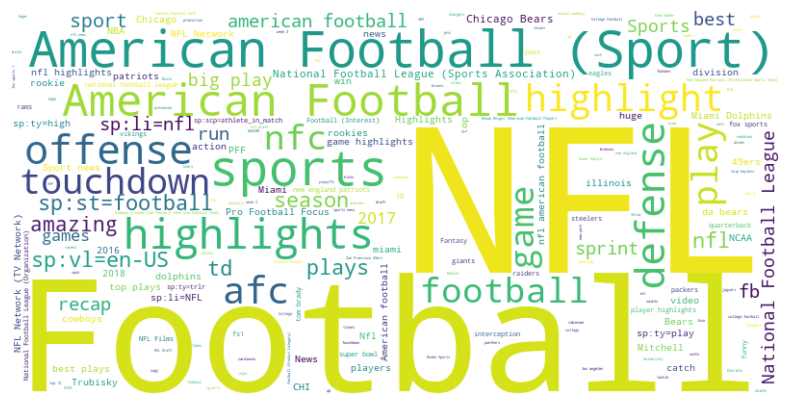

In [22]:
create_word_cloud(american_football_df, 'tags', ",")

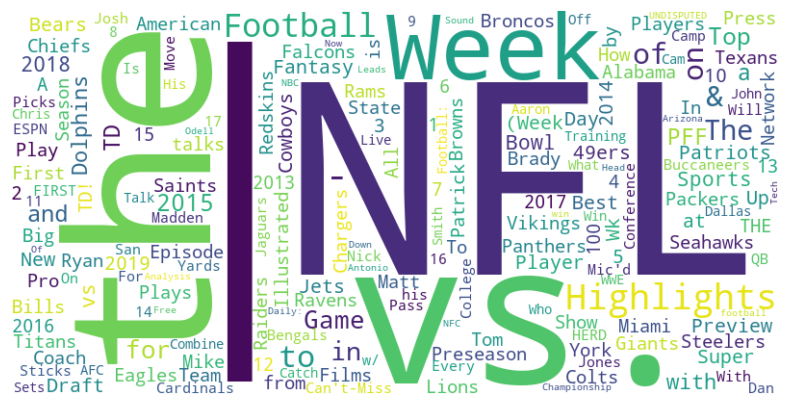

In [23]:
create_word_cloud(american_football_df, 'title', " ")

### Graphs

In [24]:
def graph_timeseries_all_time(df):
    # Create a new column that combines year and month
    df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

    # Group by the new 'year_month' column and sum the view counts
    year_month_view_count = df.groupby('year_month')['view_count'].sum().reset_index()

    # Plot the data
    plt.figure(figsize=(40, 12))
    plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
    plt.title('View Count Increment Throughout the Years and Months')
    plt.xlabel('Year-Month')
    plt.ylabel('View Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

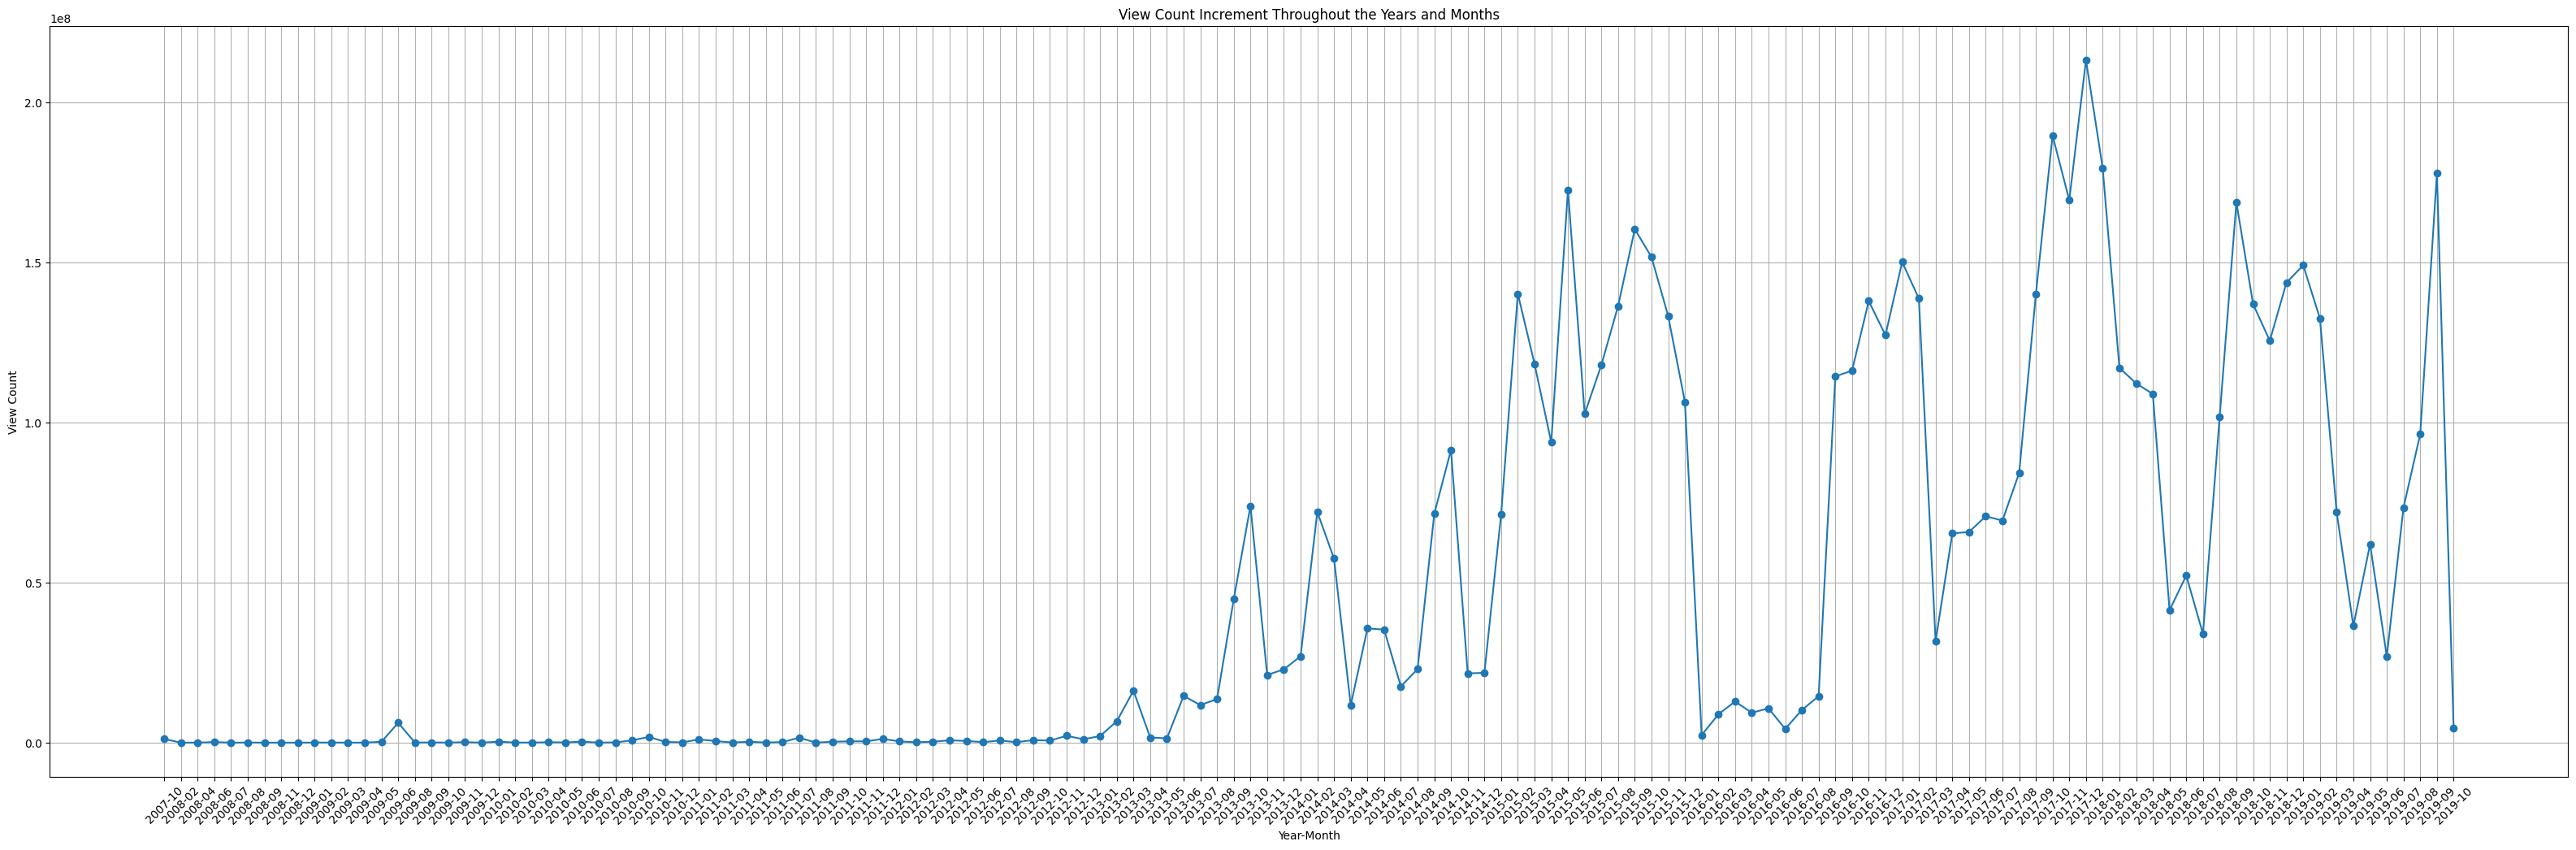

In [25]:
graph_timeseries_all_time(american_football_df)

In [26]:
def graph_groupby_time(df):
    # Group by year, month, and day and sum the view counts
    grouped_df = df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

    # Pivot the table to have years as columns and months/days as rows
    pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

    # Plot the data
    pivot_df.plot(kind='line', figsize=(15, 8))
    plt.title('Amount of Views by Year, Month, and Day')
    plt.xlabel('Month and Day')
    plt.ylabel('View Count')
    plt.legend(title='Year')
    plt.show()

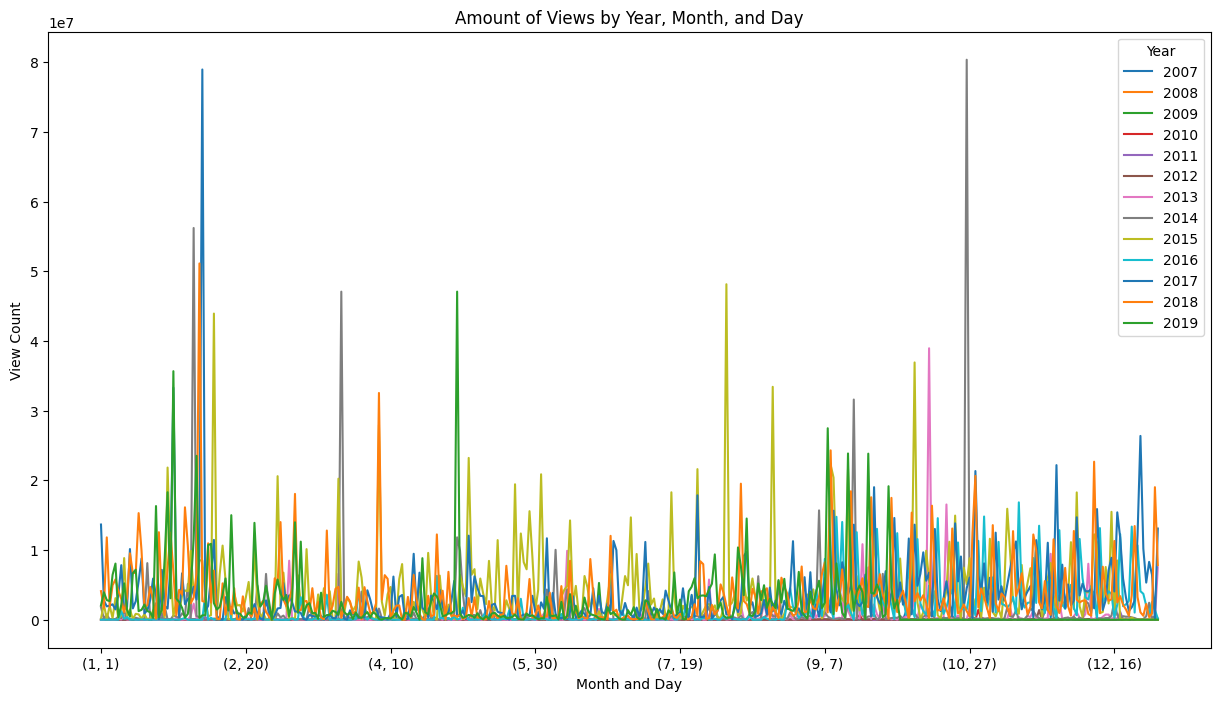

In [27]:
graph_groupby_time(american_football_df)

In [28]:
def graph_bar_plot_time(df, date_type="month"):
    time_data = df.groupby(['year', date_type])['view_count'].sum().reset_index()

    # Create a pivot table to have years as columns and months as rows
    pivot_data = time_data.pivot(index=date_type, columns='year', values='view_count').fillna(0)

    # Plot the data
    pivot_data.plot(kind='bar', figsize=(15, 8))
    plt.title(f'View Count by {date_type} for Each Year')
    plt.xlabel(f'{date_type.capitalize()}')
    plt.ylabel('View Count')
    plt.xticks(rotation=0)
    plt.legend(title='Year')
    # plt.yscale('log')
    plt.grid(axis='y')
    plt.show()

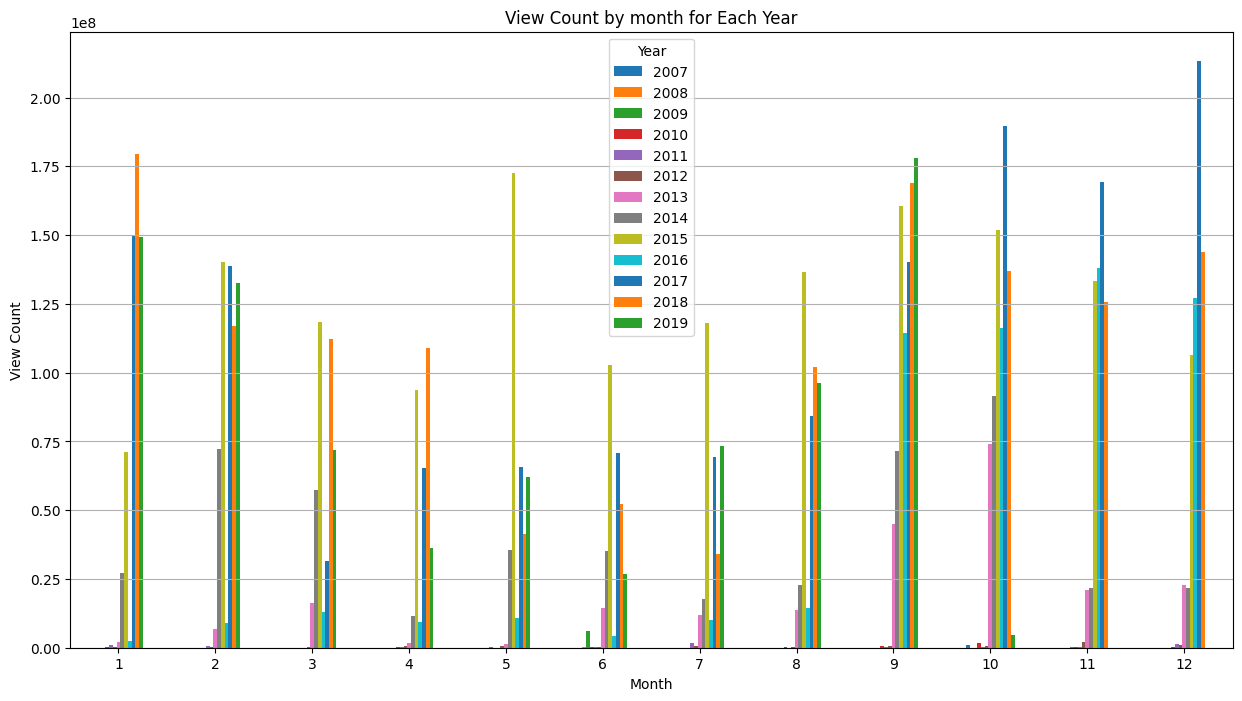

In [29]:
graph_bar_plot_time(american_football_df)

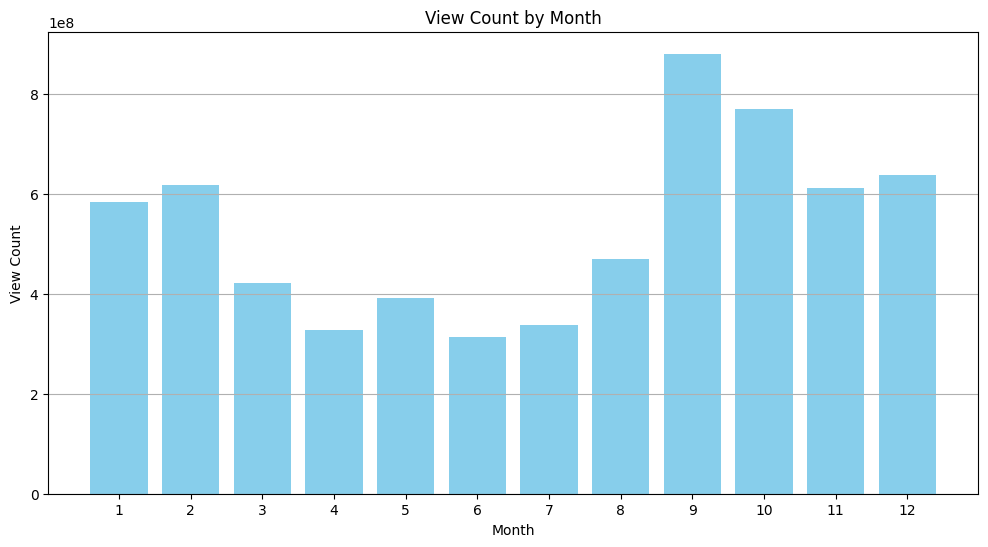

In [30]:
monthly_data = american_football_df.groupby('month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_data['month'], monthly_data['view_count'], color='skyblue')
plt.title('View Count by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.xticks(monthly_data['month'])
plt.grid(axis='y')
plt.show()

### Do impact tests

In [31]:
def dif_in_dif(df_timeseries, treatment_date, x_column, bool_treatment_list):    
    # Create a binary treatment indicator, (is someting general, not only is_sports)
    df_timeseries['is_sports'] = np.where(bool_treatment_list, 1, 0)
    # df_timeseries['is_sports'] = np.where(df_timeseries['category'] == 'Sports', 1, 0)

    # Define treatment date (modify as per your specific analysis)
    treatment_date = pd.to_datetime(treatment_date)

    # Create a binary time indicator
    df_timeseries['post_treatment'] = np.where(df_timeseries['upload_date'] >= treatment_date, 1, 0)

    # Create interaction term
    df_timeseries['interaction'] = df_timeseries['is_sports'] * df_timeseries['post_treatment']

    # Perform DiD regression
    model = smf.ols(f"{x_column} ~ is_sports + post_treatment + interaction", data=df_timeseries).fit()

    # Print regression summary
    print(model.summary())

    # Create summary for visualization
    summary = df_timeseries.groupby(['post_treatment', 'is_sports'])[x_column].mean().reset_index()
    summary['Group'] = summary['is_sports'].apply(lambda x: 'Sports' if x == 1 else 'Control')
    summary['Period'] = summary['post_treatment'].apply(lambda x: 'Post-Treatment' if x == 1 else 'Pre-Treatment')

    # Bar Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x='Period', y=x_column, hue='Group', data=summary)
    plt.title(f'Average {x_column} by Group and Period')
    plt.ylabel(f'Average {x_column}')
    plt.show()

    # Time Series Plot
    time_summary = df_timeseries.groupby(['upload_date', 'is_sports'])[x_column].mean().reset_index()

    time_summary['Group'] = time_summary['is_sports'].apply(lambda x: 'Sports' if x == 1 else 'Control')

    # Plot
    plt.figure(figsize=(14,7))
    sns.lineplot(x='upload_date', y=x_column, hue='Group', data=time_summary, marker='o')
    plt.axvline(x=treatment_date, color='red', linestyle='--', label='Treatment Date')
    plt.title(f'{x_column} Over Time by Group')
    plt.xlabel('Date')
    plt.ylabel(f'Average {x_column}')
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     36.22
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.12e-23
Time:                        18:22:51   Log-Likelihood:            -6.5102e+07
No. Observations:             4354410   AIC:                         1.302e+08
Df Residuals:                 4354406   BIC:                         1.302e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.781e+04    517.539    111.

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

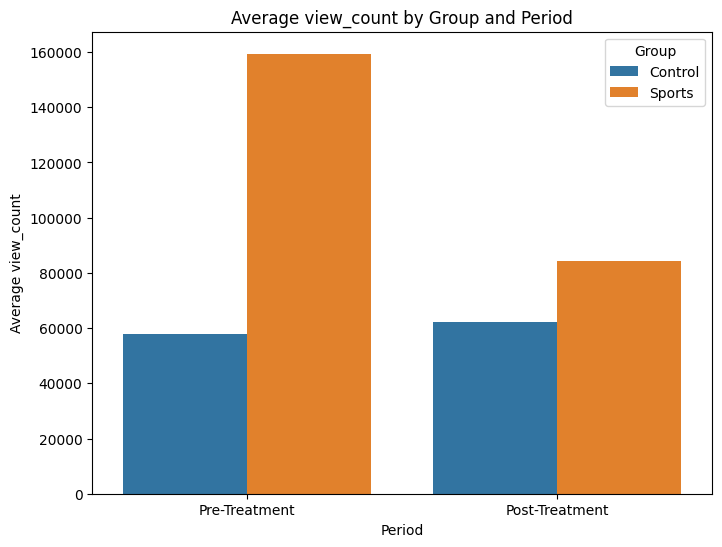

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

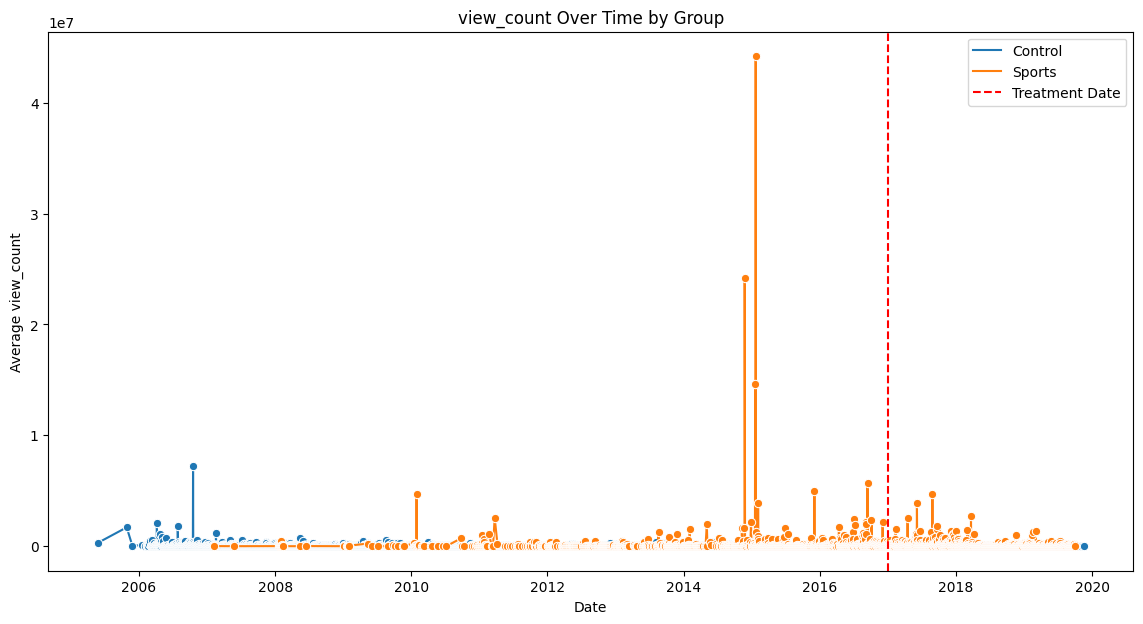

In [32]:
bool_treatment_list = filtered_df_sport_category.apply(lambda row: 'superbowl' in row['tags'].lower() or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)


dif_in_dif(filtered_df_sport_category, pd.to_datetime('2017-01-01'), 'view_count', bool_treatment_list)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

def arima_event_impact(df, date_column, value_column, event_date, order=(1, 1, 1)):
    #
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the index
    df.set_index(date_column, inplace=True)
    
    # Fit the ARIMA model
    model = ARIMA(df[value_column], order=order)
    model_fit = model.fit()
    
    # Forecast the values
    forecast = model_fit.get_forecast(steps=30)
    forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df[value_column], label='Historical Data')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
    plt.axvline(pd.to_datetime(event_date), color='green', linestyle='--', label='Event Date')
    plt.title('Impact of Event on Time Series')
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No su

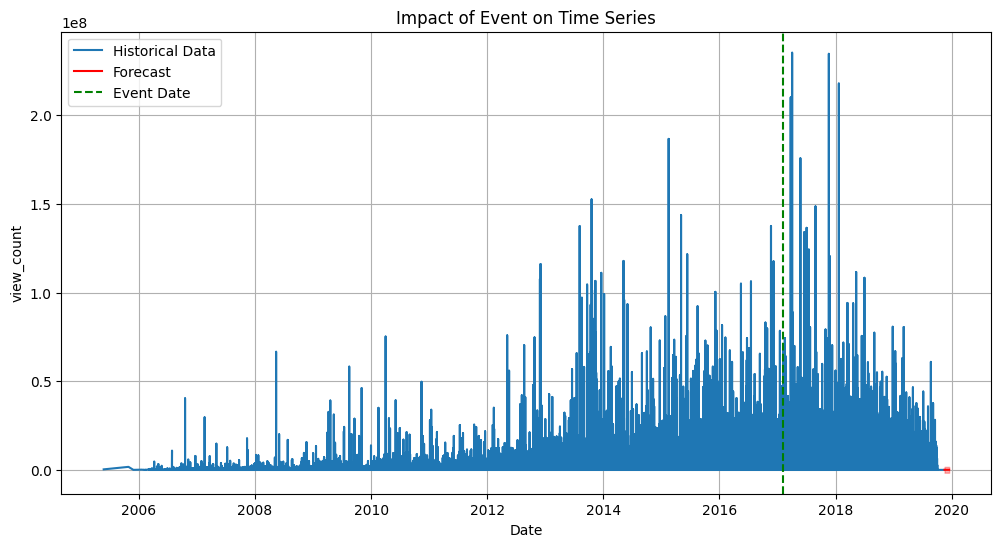

In [34]:
arima_event_impact(filtered_df_sport_category, 'upload_date', 'view_count', '2017-02-06', order=(1, 1, 1))

### Check for seasonality

How to test the impact of an external event on a time series?
- You should test first the hypothesis you mention with a structural break test (there various test you should try several). If your hypothesis turns out to be correct then you should introduce a structural break in your regression in order to correct. Moreover, if you think the event is likely to occur again in the future a sophisticated way to treat the problem is using a Markov Switching Model.
- doing a time series regression with dummy variables for the event.



To perform linear time regression to measure the impact of an event using Python, you can follow these steps:
- Prepare the data
- Create the regression model
- Fit the model and interpret results

Here's a detailed guide with Python code:

Data Preparation

```python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'date', 'value', and 'event'
# 'event' should be a binary column (0 before the event, 1 after)

# Create a time variable (days since start)
df['time'] = (df['date'] - df['date'].min()).dt.days

# Create interaction term
df['time_after_event'] = df['time'] * df['event']

```

Create and Fit the Model

Now, create and fit the linear regression model:

```python
# Prepare X and y
X = df[['time', 'event', 'time_after_event']]
y = df['value']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print results
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
```

Interpret Results

The coefficients can be interpreted as follows:
- model.coef_: Pre-event time trend
- model.coef_[1]: Immediate change in level after the event
- model.coef_[2]: Change in slope after the event

Visualize Results

To visualize the results:

```python
# Generate predictions
df['predicted'] = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['value'], color='blue', label='Actual')
plt.plot(df['time'], df['predicted'], color='red', label='Predicted')
plt.axvline(x=df[df['event'] == 1]['time'].min(), color='green', linestyle='--', label='Event')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Impact of Event on Time Series')
plt.show()
```

Additional Considerations
Check for autocorrelation: Time series data often violates the independence assumption of OLS. You can use the Durbin-Watson test to check for autocorrelation2.
Handle seasonality: If your data has seasonal patterns, include seasonal dummy variables in your model4.
Model diagnostics: Examine residuals for normality and homoscedasticity.
Robustness checks: Consider alternative specifications or different time windows around the event.
Advanced techniques: For more complex scenarios, consider using interrupted time series analysis or ARIMA models1.
Remember that this simple linear regression approach assumes a constant trend before and after the event. If this assumption is violated, you may need to use more sophisticated techniques3.
By following these steps and considering the nuances of your specific data, you can effectively use linear time regression in Python to measure the impact of an event on your time series data.

Arima

- Order (p, d, q), The order parameter in an ARIMA or ARIMAX model specifies the three main components that characterize the model:

  - p: The number of autoregressive (AR) terms. This represents how many past observations the model uses to predict the current value. A higher p means the model considers more past values.
  - d: The number of differencing steps to make the time series stationary (removing trends). For instance, if d = 1, the model looks at the differences between consecutive observations to remove trends.
  - q: The number of moving average (MA) terms. This represents the number of past error terms (or residuals) used to make predictions. Higher q values mean the model accounts for more past residuals in its predictions.

-  Exogenous Variables (exog):
   -  The exog parameter in an ARIMAX model lets you include external (exogenous) variables that might influence the time series values. These are additional factors outside the ARIMA structure that could affect the outcome variable. In your case, exog would include the dummy variables for the pre-event, event, and post-event periods, as well as any other relevant predictors (like seasonality or external economic indicators, if they’re expected to affect the time series). 
   -  For example, if you want to test the impact of a long-duration event on your time series, you could set up exog as a DataFrame containing dummy variables that indicate each period (e.g., pre-event, event, post-event).


The testing can be done in:

- In-sample predictions (within the period you trained on) to see how well the model fits the data.
- Out-of-sample forecasts (extending into a future period or post-event) to observe if there is a sustained impact after the event.

Model Selection Using Information Criteria
- Use Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) to select the optimal ARIMA order (p, d, q). These criteria balance model fit with model complexity, penalizing overly complex models.

**To test significance, it should be as simple as checking to see if the pre/post ARIMA coefficients have overlapping 95% confidence intervals. There is also a question of correlated errors, in which case block bootstrap may be necessary instead, see here:**

In [35]:
# We have multiple videos in a day, but we don't really care about the order of those videos, so it shouldn't be a problem for the arima, it could also be possible to a sum of the view_count for each day (and maybe that could be better, but there shouldn't be a big difference)

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
import statsmodels.api as sm

def check_impact_of_event_arima(df_timeseries, treatment_date, event_column="upload_date", x_column="view_count", bool_treatment_list=None, months_you_want_to_check_impact=3, order=(1, 1, 1)):
    start_date = treatment_date - pd.DateOffset(months=months_you_want_to_check_impact)

    extra_months_for_prediction = 3
    start_date_for_original = start_date - pd.DateOffset(months=months_you_want_to_check_impact + extra_months_for_prediction)

    end_date = treatment_date + pd.DateOffset(months=months_you_want_to_check_impact)
    end_date_for_original = end_date + pd.DateOffset(months=months_you_want_to_check_impact + extra_months_for_prediction)
    
    df_original = df_timeseries.copy()
    df_original['treatment'] = df_original[event_column].apply(
        lambda x: 1 if x >= treatment_date else 0)
    df_original = df_original[(df_original[event_column] >= start_date_for_original) & (df_original[event_column] <= end_date_for_original)]

    df = df_original[(df_original[event_column] >= start_date) & (df_original[event_column] <= end_date)].copy()

    # We don't use the bool_treatment_list for this function in the end
    # if bool_treatment_list is None:
    #     raise ValueError("bool_treatment_list cannot be None")
    
    # fit arima with treatment
    model = ARIMA(df[x_column], exog=df['treatment'], order=order)
    model_fit = model.fit()

    print(model_fit.summary())

    df['fitted'] = model_fit.predict()


    plt.plot(df.groupby(event_column)[x_column].sum(), label='Actual', color='blue')
    plt.plot(df.groupby(event_column)['fitted'].sum(), label='Fitted', color='red')
    plt.axvline(x=treatment_date, color='green', linestyle='--', label='Event Date')
    plt.xlabel('Date')
    plt.ylabel(x_column)
    plt.legend()
    plt.title(f'Impact of Event on {x_column}')
    plt.show()

    # Plot actual and forecasted values
    plt.plot(df.groupby(event_column)[x_column].sum(), label='Actual', color='blue')
    plt.plot(df.groupby(event_column)['fitted'].sum(), label='Fitted', color='red')

    # plot the residuals
    plt.fill_between(df.groupby(event_column)[event_column].max(), df.groupby(event_column)[x_column].sum(), df.groupby(event_column)['fitted'].sum(), color='gray', where=(df.groupby(event_column)[x_column].sum() > df.groupby(event_column)['fitted'].sum()), alpha=0.7, label='Positive Residuals', linewidth=3)

    plt.fill_between(df.groupby(event_column)[event_column].max(), df.groupby(event_column)[x_column].sum(), df.groupby(event_column)['fitted'].sum(), color='brown', where=(df.groupby(event_column)[x_column].sum() < df.groupby(event_column)['fitted'].sum()), alpha=0.7, label='Negative Residuals', linewidth=3)

    # check if the residuals had an impact with t-test

    residuals = df.groupby(event_column)[x_column].sum() - df.groupby(event_column)['fitted'].sum()
    
    # Filter residuals based on treatment condition
    residuals_pre_treatment = residuals[residuals.index < treatment_date]
    residuals_post_treatment = residuals[residuals.index >= treatment_date]
    
    # Ensure both lists have the same size
    min_length = min(len(residuals_pre_treatment), len(residuals_post_treatment))
    residuals_pre_treatment = residuals_pre_treatment[:min_length]
    residuals_post_treatment = residuals_post_treatment[:min_length]
    
    ttest = sm.stats.ttest_ind(residuals_pre_treatment, residuals_post_treatment)
    print(f"t-test, test statistic: {ttest[0]}, p-value: {ttest[1]}")
    if ttest[1] < 0.05:
        print("The event had an impact")
    else:
        print("The event did not have an impact")

    plt.axvline(x=treatment_date, color='green', linestyle='--', label='Event Date', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel(x_column)
    plt.legend()
    plt.title(f'Impact of Event on {x_column}')
    plt.show()

    # now lets do the testing with a forecast that is 3 months more before the treatment date and 3 more months after the treatment date

    print("Out of sample forecast")
    # Forecast future and past values
    forecast = model_fit.predict(exog=df_original['treatment'])
    # forecast_values = forecast.predicted_mean
    # forecast_ci = forecast.conf_int()
    # forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, freq='D')

    df_original['forecast'] = forecast

    plt.plot(df_original.groupby(event_column)[x_column].sum(), label='Actual', color='blue')
    plt.plot(df_original.groupby(event_column)['forecast'].sum(), label='Forecast', color='red')
    plt.axvline(x=treatment_date, color='green', linestyle='--', label='Event Date')
    plt.xlabel('Date')
    plt.ylabel(x_column)
    plt.legend()
    plt.title(f'Impact of Event on {x_column}')
    plt.show()

    residuals = df_original.groupby(event_column)[x_column].sum() - df_original.groupby(event_column)['forecast'].sum()

    # Filter residuals based on treatment condition
    residuals_pre_treatment = residuals[residuals.index < treatment_date]
    residuals_post_treatment = residuals[residuals.index >= treatment_date]

    # Ensure both lists have the same size
    min_length = min(len(residuals_pre_treatment), len(residuals_post_treatment))
    residuals_pre_treatment = residuals_pre_treatment[:min_length]
    residuals_post_treatment = residuals_post_treatment[:min_length]

    ttest = sm.stats.ttest_ind(residuals_pre_treatment, residuals_post_treatment)
    print(f"t-test, test statistic: {ttest[0]}, p-value: {ttest[1]}")
    if ttest[1] < 0.05:
        print("The event had an impact")
    else:
        print("The event did not have an impact")
    

#### Do it in american footbal

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/

                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 3991
Model:                ARIMA(10, 1, 1)   Log Likelihood              -60742.753
Date:                Sun, 10 Nov 2024   AIC                         121511.505
Time:                        18:29:16   BIC                         121593.296
Sample:                             0   HQIC                        121540.502
                               - 3991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment   8.614e+04   1.01e-12   8.49e+16      0.000    8.61e+04    8.61e+04
ar.L1         -0.6199      0.017    -35.788      0.000      -0.654      -0.586
ar.L2         -0.5464      0.016    -34.789      0.0

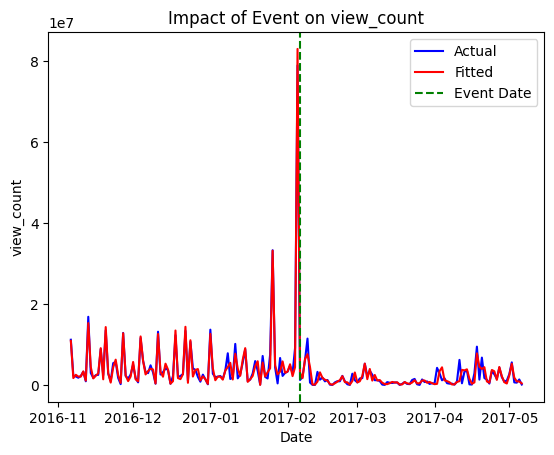

t-test, test statistic: 0.1339730540280962, p-value: 0.8935752364395995
The event did not have an impact


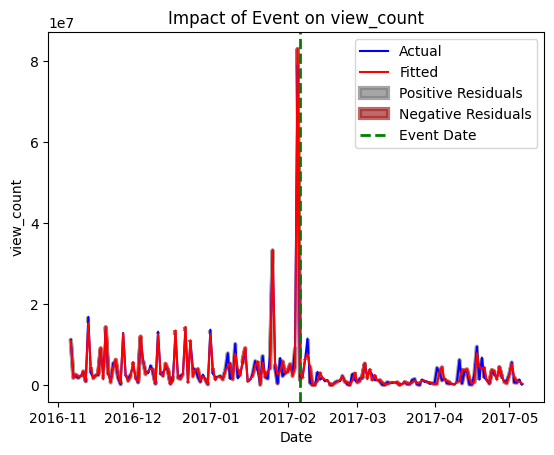

Out of sample forecast


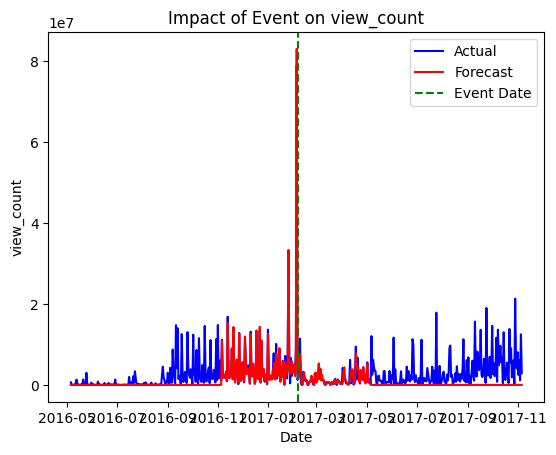

t-test, test statistic: -4.198472914036257, p-value: 3.1443685014365e-05
The event had an impact


In [36]:
bool_treatment_list = american_football_df.apply(lambda row: 'superbowl' in row['tags'].lower(
) or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)

check_impact_of_event_arima(american_football_df, pd.to_datetime('2017-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=3, order=(10, 1, 1))

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 7499
Model:                ARIMA(10, 1, 1)   Log Likelihood             -112870.942
Date:                Sun, 10 Nov 2024   AIC                         225767.883
Time:                        18:29:29   BIC                         225857.874
Sample:                             0   HQIC                        225798.786
                               - 7499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment   8.614e+04   1.38e-09   6.25e+13      0.000    8.61e+04    8.61e+04
ar.L1          0.0244      0.007      3.312      0.001       0.010       0.039
ar.L2          0.0325      0.008      4.231      0.0

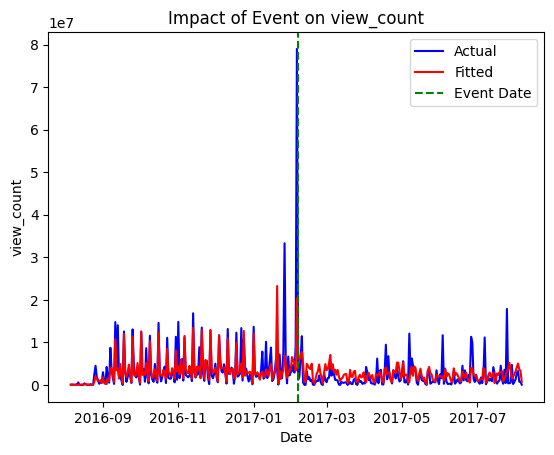

t-test, test statistic: 2.9349285839914896, p-value: 0.0035491368175536637
The event had an impact


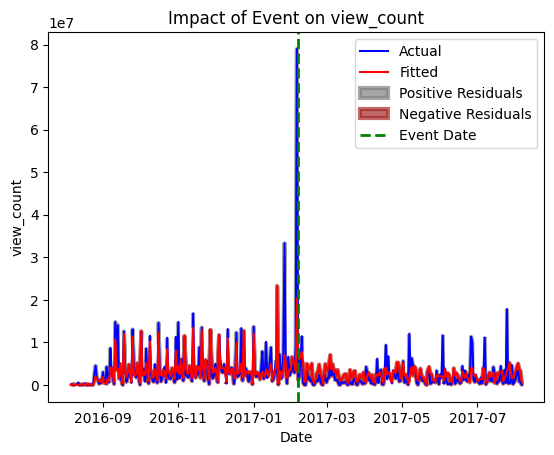

Out of sample forecast


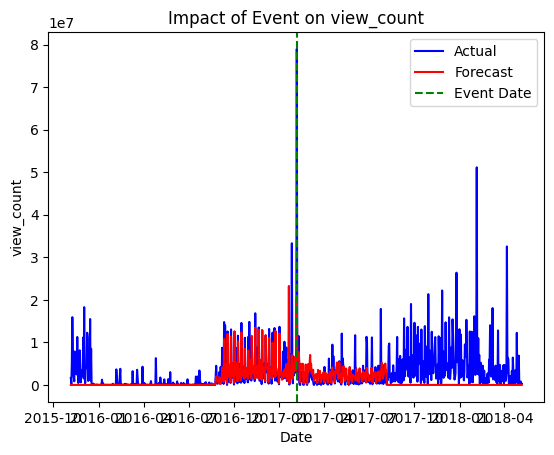

t-test, test statistic: -5.519399623468703, p-value: 4.4843643158040244e-08
The event had an impact


In [37]:
bool_treatment_list = american_football_df.apply(lambda row: 'superbowl' in row['tags'].lower(
) or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)

check_impact_of_event_arima(american_football_df, pd.to_datetime('2017-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6, order=(10, 1, 1))

To determine if an event had an impact on your time series, you can compare the forecasted values (from your ARIMA model, based on pre-event data) with the actual observed values post-event. This approach is often referred to as intervention analysis or impact assessment. Here’s a structured way to approach it:

Statistical Tests (Optional): Use statistical tests, such as the t-test or Cumulative Sum (CUSUM) test, to check if the residuals are significantly different from zero. Large, consistent deviations indicate that the event had an impact.

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 9245
Model:                ARIMA(10, 1, 1)   Log Likelihood             -138144.759
Date:                Sun, 10 Nov 2024   AIC                         276315.518
Time:                        18:29:38   BIC                         276408.230
Sample:                             0   HQIC                        276347.023
                               - 9245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment   3.648e+06   2.04e-10   1.79e+16      0.000    3.65e+06    3.65e+06
ar.L1          0.0167      0.007      2.289      0.022       0.002       0.031
ar.L2          0.0038      0.008      0.456      0.6

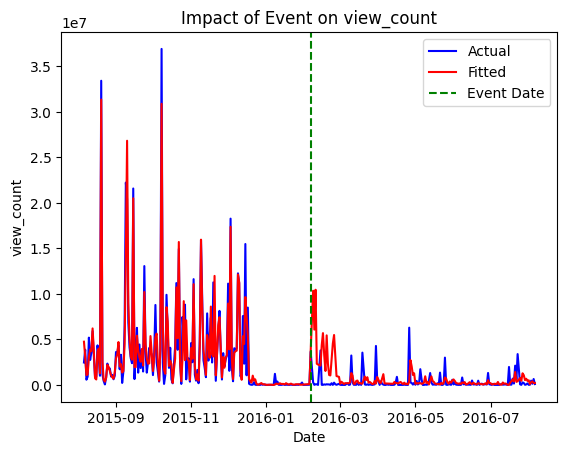

t-test, test statistic: 2.0914723115745852, p-value: 0.03723182690334973
The event had an impact


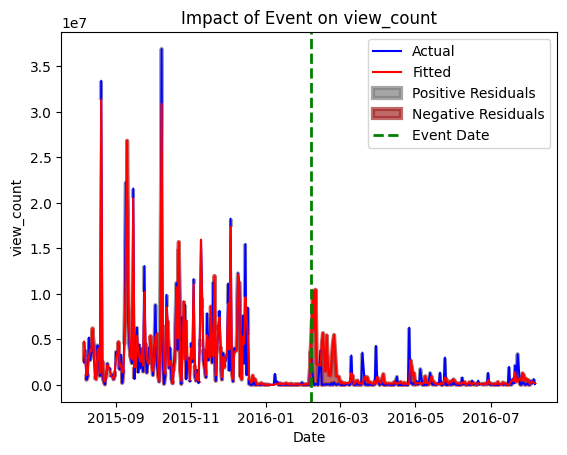

Out of sample forecast


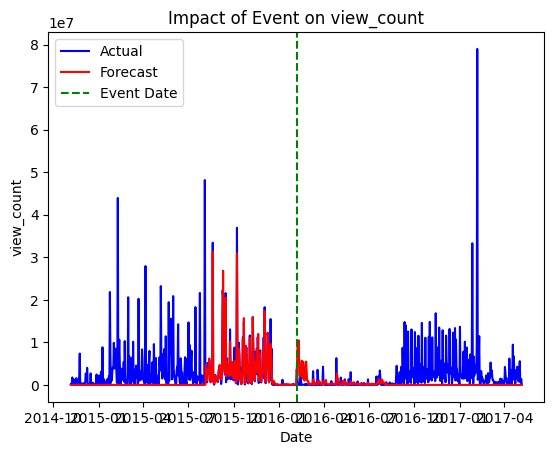

t-test, test statistic: 0.5090793757018303, p-value: 0.6108236279766325
The event did not have an impact


In [38]:
check_impact_of_event_arima(american_football_df, pd.to_datetime('2016-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6, order=(10, 1, 1))

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 8160
Model:                ARIMA(10, 1, 1)   Log Likelihood             -122336.036
Date:                Sun, 10 Nov 2024   AIC                         244698.072
Time:                        18:29:47   BIC                         244789.162
Sample:                             0   HQIC                        244729.220
                               - 8160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment   1.182e+06   7.25e-10   1.63e+15      0.000    1.18e+06    1.18e+06
ar.L1          0.0293      0.011      2.645      0.008       0.008       0.051
ar.L2          0.0025      0.013      0.195      0.8

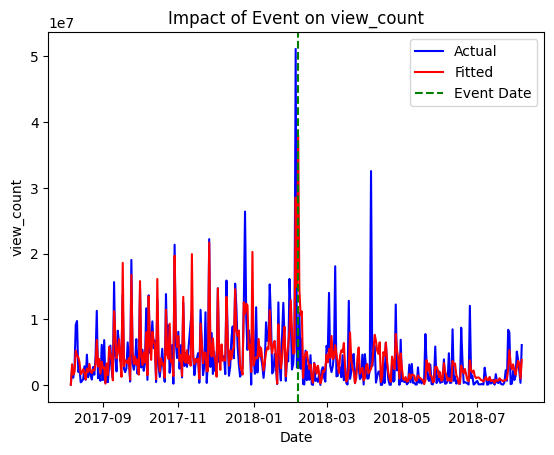

t-test, test statistic: 1.142887904139319, p-value: 0.25384042545022023
The event did not have an impact


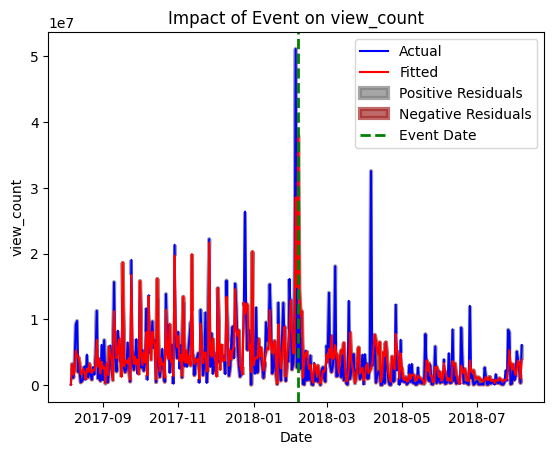

Out of sample forecast


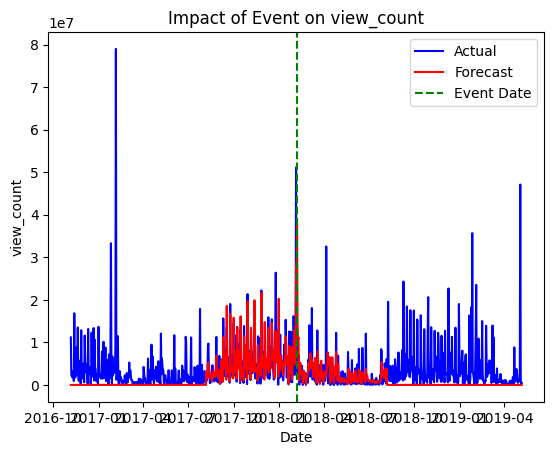

t-test, test statistic: -1.1123672355085565, p-value: 0.2662747026067046
The event did not have an impact


In [39]:
check_impact_of_event_arima(american_football_df, pd.to_datetime('2018-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6, order=(10, 1, 1))

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 8244
Model:                ARIMA(10, 1, 1)   Log Likelihood             -128401.097
Date:                Sun, 10 Nov 2024   AIC                         256828.194
Time:                        18:29:54   BIC                         256919.416
Sample:                             0   HQIC                        256859.371
                               - 8244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment  -5.003e+06   7.78e-11  -6.43e+16      0.000      -5e+06      -5e+06
ar.L1          0.0035      0.007      0.512      0.609      -0.010       0.017
ar.L2          0.0034      0.007      0.498      0.6

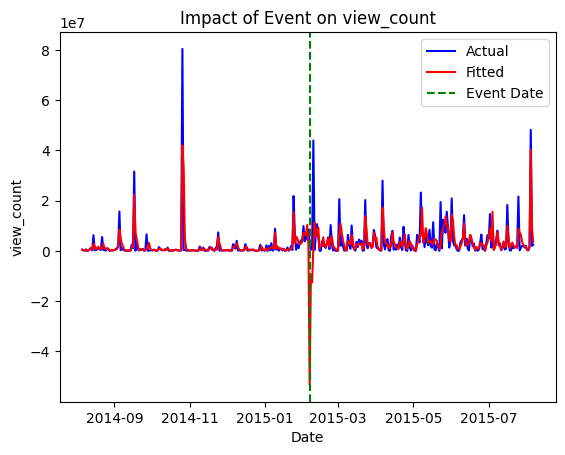

t-test, test statistic: -0.9710917818299352, p-value: 0.33215097239227753
The event did not have an impact


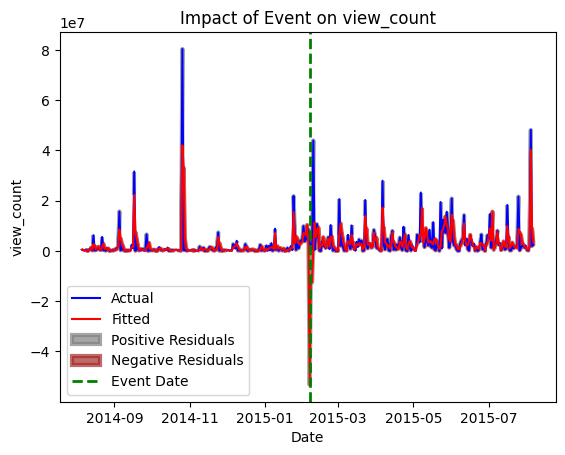

Out of sample forecast


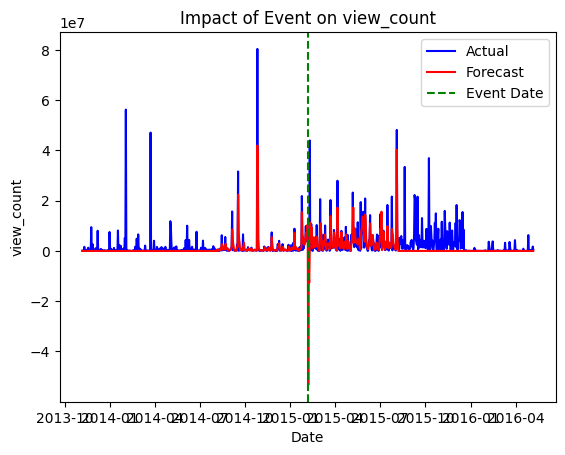

t-test, test statistic: -3.08687907180998, p-value: 0.0020859192130210954
The event had an impact


In [40]:
check_impact_of_event_arima(american_football_df, pd.to_datetime('2015-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6, order=(10, 1, 1))

#### Do it in sports general

In [42]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [43]:
filtered_df_sport_category['upload_date'] = pd.to_datetime(filtered_df_sport_category['upload_date'])
filtered_df_sport_category['year'] = filtered_df_sport_category['upload_date'].dt.year
filtered_df_sport_category['month'] = filtered_df_sport_category['upload_date'].dt.month
filtered_df_sport_category['day'] = filtered_df_sport_category['upload_date'].dt.day

# sort values by date
filtered_df_sport_category.sort_values(by='upload_date', inplace=True)
filtered_df_sport_category.reset_index(drop=True, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:               626990
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -9505521.313
Date:                Sun, 10 Nov 2024   AIC                       19011050.627
Time:                        18:35:30   BIC                       19011096.021
Sample:                             0   HQIC                      19011063.358
                             - 626990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment  -9.341e+04   7.74e-13  -1.21e+17      0.000   -9.34e+04   -9.34e+04
ar.L1          0.0095      0.001     12.631      0.000       0.008       0.011
ma.L1         -0.9997    3.9e-05  -2.56e+04      0.0

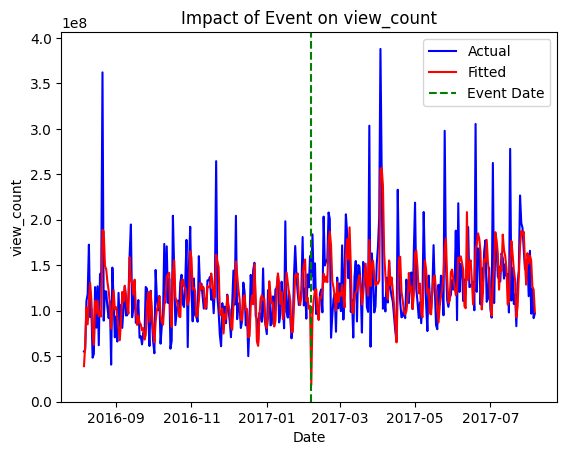

t-test, test statistic: -0.2876139528161051, p-value: 0.7738068425101203
The event did not have an impact


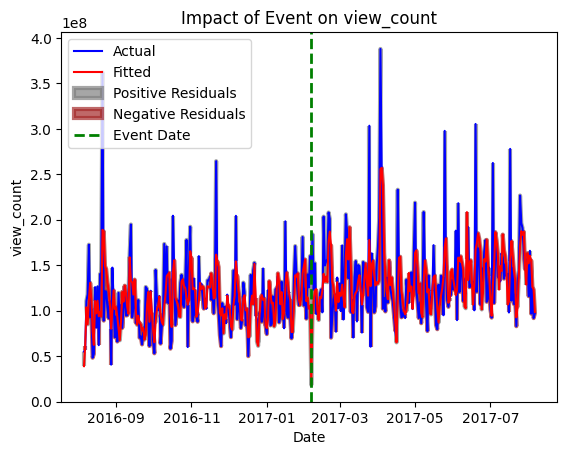

Out of sample forecast


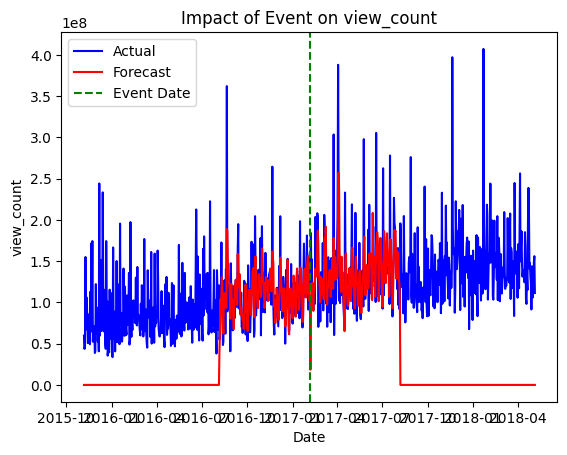

t-test, test statistic: -7.222624355145424, p-value: 1.0789330115263384e-12
The event had an impact


In [44]:
check_impact_of_event_arima(filtered_df_sport_category, pd.to_datetime('2017-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6)